
---

<div style="text-align: center">

<h3><b>INSTITUTO TECNOLÓGICO Y DE ESTUDIOS SUPERIORES DE MONTERREY</b></h3> 
<h3><b>CAMPUS CIUDAD DE MÉXICO</b></h3> 
</div>

---


<div style="text-align: center">

<h4><b>¿Qué pasó en el 2020? Un breve análisis exploratorio de datos y un modelo predictivo de causa de muerte en ese año</b></h4> 

<h5><b>Matemáticas y Ciencia de Datos para la Toma de Decisiones</b></h5>  
<h5><b>MA1042.60</b></h5>  

<h5><b>Profesor:</b> Eduardo Francisco Guerrero Ordaz</h5>  

<h5><b>Diego Colin Reyes</b></h5>  
<h5><b>A01666354</b></h5>  


</div>

### Introducción

<div style="text-align: justify">

Se analizará la base de datos "Conjunto de Defunciones registradas 2020" recuperada de los datos abiertos de la [Secretaría de Salud](https://datos.gob.mx/busca/dataset/defunciones) una página oficial del gobierno de México donde se recopilan datos públicos respecto a varios temas en aspectos de salud. Esta base cuenta con alrededor de 1.1 millones de registros de defunciones a nivel nacional ocurridas en el 2020, se revisará esta base con la intención de mostrar algunas situaciones interesantes ocurridas durante ese año, como estados con mayor cantidad de suicidios, que estados tuvieron mayores fallecimientos por covid o los homicidios por estado. Esto con el fin de al final realizar un modelo predictivo que te intente dar la causa de muerte mas probable de acuerdo a ciertas variables, se verificará su precisión y se darán conclusiones al respecto.
</div>


### Antecedentes

<div style="text-align: justify">

El año 2020 fue un año histórico a nivel mundial, se estaba trabajando en las vacunas por el COVID-19 y la población se encontraba en pandemia, además de que se no se sabía mucho del virus y tampoco había todavía ninguna vacuna efectiva, la población a nivel mundial se encerró por meses sin saber que era lo que iba a pasar, por ello es importante ver que es lo que sucedió durante ese año, específicamente en las defunciones ocurridas, así como ver las principales causas de muerte ese año, grupos de edad interesantes, presuntas defunciones violentas, como otros aspectos que se pueden recuperar de esta base de datos.

</div>

### Descripción

<div style="text-align: justify">

Es una base de datos que cuenta con 59 columnas y es bastante grande, por lo que por el momento solamente se analizaran las variables de:

</div>

|Nombre de columna| Significado | 
| :-----------: | :-----------: | 
|causa_def|Causa de defunción específica|
|lista_mex|Lista Mexicana de causa de defunción|
|ent_regis|Entidad de registro|
|ent_ocurr|Entidad de ocurrencia|
|ent_resid|Entidad de localidad habitual|
|sexo|Sexo|
|edad|Edad|
|edad_agru|Edad agrupada|
|dia_ocurr|Día de defunción|
|mes_ocurr|Mes de defunción|
|anio_ocur|Año de defunción|
|escolarida|Educación|
|edo_civil|Estado civil|
|ocupacion|Ocupación|
|sitio_ocur|Sitio ocurrencia|
|presunto|Tipo de defunción(Presunto)|
|par_agre|Parentesco del presunto agresor|
|area_ur|Área urbana o rural|

En este caso por el tipo y forma de guardado de la base de datos todas las variables son categóricas.

In [1]:
#Importando librerias para el manejo de los datos

import pandas as pd
import numpy as np

import scipy.stats as stats
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.metrics import accuracy_score, classification_report


import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importando el csv a usar

data = pd.read_csv("conjunto_de_datos_defunciones_registrados_2020.csv")

#Mostrando los primeros 5 elementos
data.head()

,ent_regis,mun_regis,ent_resid,mun_resid,tloc_resid,loc_resid,ent_ocurr,mun_ocurr,tloc_ocurr,loc_ocurr,...,anio_cert,maternas,lengua,cond_act,par_agre,ent_ocules,mun_ocules,loc_ocules,razon_m,dis_re_oax
0,1,1,1,1,15,1,1,1,15,1,...,2020,NaN,2,9,88,88,888,8888,0,999
1,1,1,1,1,15,1,1,1,15,1,...,2020,NaN,9,9,88,88,888,8888,0,999
2,1,1,1,1,15,1,1,1,15,1,...,2020,NaN,2,2,88,88,888,8888,0,999
3,1,1,1,1,15,1,1,1,15,1,...,2020,NaN,9,9,88,88,888,8888,0,999
4,1,6,1,9,4,1,1,9,4,1,...,2020,NaN,2,1,88,88,888,8888,0,999


In [3]:
#Mostrando los últimos 5 elementos
data.tail()

,ent_regis,mun_regis,ent_resid,mun_resid,tloc_resid,loc_resid,ent_ocurr,mun_ocurr,tloc_ocurr,loc_ocurr,...,anio_cert,maternas,lengua,cond_act,par_agre,ent_ocules,mun_ocules,loc_ocules,razon_m,dis_re_oax
1086738,32,17,32,17,13,1,32,56,13,1,...,2020,NaN,2,2,88,88,888,8888,0,999
1086739,32,56,32,5,9,1,32,56,13,1,...,2020,NaN,8,8,88,88,888,8888,0,999
1086740,32,17,32,56,13,1,32,17,13,1,...,2020,NaN,2,1,88,88,888,8888,0,999
1086741,32,24,32,24,8,1,32,17,13,1,...,2020,NaN,2,2,88,88,888,8888,0,999
1086742,32,56,32,56,13,1,32,56,13,1,...,2020,NaN,9,9,88,88,888,8888,0,999


In [4]:
#Lista de valores de interés
interest_columns = ["sexo", "edad", "edad_agru", "escolarida", "edo_civil", "ocupacion", "sitio_ocur","causa_def","lista_mex", "ent_regis", "ent_ocurr", "ent_resid" , "dia_ocurr", "mes_ocurr", "anio_ocur", "presunto", "par_agre", "area_ur"]


In [5]:
#Filtrando las columnas a utilizar

data = data[interest_columns]

#Mostrando los primeros 5 elementos de las columnas filtradas
data.head()

,sexo,edad,edad_agru,escolarida,edo_civil,ocupacion,sitio_ocur,causa_def,lista_mex,ent_regis,ent_ocurr,ent_resid,dia_ocurr,mes_ocurr,anio_ocur,presunto,par_agre,area_ur
0,2,4074,19,3,5,99,11,J441,33G,1,1,1,25,11,2016,8,88,1
1,2,4087,22,1,3,99,1,K566,35I,1,1,1,7,2,2016,8,88,1
2,2,4062,17,4,5,11,3,I120,27Z,1,1,1,18,5,2011,8,88,1
3,1,4080,21,1,3,99,11,J869,33Z,1,1,1,27,1,2017,8,88,1
4,1,4078,20,4,5,6,11,I709,31A,1,1,1,14,2,2018,8,88,1


In [6]:
#Mostrando los últimos 5 elementos de las columnas filtradas
data.tail()

,sexo,edad,edad_agru,escolarida,edo_civil,ocupacion,sitio_ocur,causa_def,lista_mex,ent_regis,ent_ocurr,ent_resid,dia_ocurr,mes_ocurr,anio_ocur,presunto,par_agre,area_ur
1086738,2,4068,18,3,2,11,3,U072,06T,32,32,32,31,12,2020,8,88,1
1086739,1,2022,1,88,8,97,3,P77X,46Z,32,32,32,4,2,2020,8,88,1
1086740,1,4074,19,3,5,7,1,U071,06T,32,32,32,11,12,2020,8,88,1
1086741,2,4081,21,3,1,11,1,U071,06T,32,32,32,18,12,2020,8,88,1
1086742,2,4067,18,99,3,99,3,U071,06T,32,32,32,23,8,2020,8,88,1


In [7]:
#Checando tipo de variables
data.dtypes

sexo           int64
edad           int64
edad_agru      int64
escolarida     int64
edo_civil      int64
ocupacion      int64
sitio_ocur     int64
causa_def     object
lista_mex     object
ent_regis      int64
ent_ocurr      int64
ent_resid      int64
dia_ocurr      int64
mes_ocurr      int64
anio_ocur      int64
presunto       int64
par_agre       int64
area_ur        int64
dtype: object

In [8]:
#Se cambian todos los tipos de variables a object
for col in interest_columns:
    data[col] = data[col].astype('object')

data.dtypes

sexo          object
edad          object
edad_agru     object
escolarida    object
edo_civil     object
ocupacion     object
sitio_ocur    object
causa_def     object
lista_mex     object
ent_regis     object
ent_ocurr     object
ent_resid     object
dia_ocurr     object
mes_ocurr     object
anio_ocur     object
presunto      object
par_agre      object
area_ur       object
dtype: object

In [9]:
#Se muestra la información por columna
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1086743 entries, 0 to 1086742
Data columns (total 18 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   sexo        1086743 non-null  object
 1   edad        1086743 non-null  object
 2   edad_agru   1086743 non-null  object
 3   escolarida  1086743 non-null  object
 4   edo_civil   1086743 non-null  object
 5   ocupacion   1086743 non-null  object
 6   sitio_ocur  1086743 non-null  object
 7   causa_def   1086743 non-null  object
 8   lista_mex   1086743 non-null  object
 9   ent_regis   1086743 non-null  object
 10  ent_ocurr   1086743 non-null  object
 11  ent_resid   1086743 non-null  object
 12  dia_ocurr   1086743 non-null  object
 13  mes_ocurr   1086743 non-null  object
 14  anio_ocur   1086743 non-null  object
 15  presunto    1086743 non-null  object
 16  par_agre    1086743 non-null  object
 17  area_ur     1086743 non-null  object
dtypes: object(18)
memory usage: 149.2+ MB


## Tratamiento de nulos

In [10]:
#Verificando datos nulos, como se puede ver no hay ninguno, descrito de esta manera, aunque si existen algunos
# como 'No especificado' o 'sin especificar', por lo que se toman en cuenta como nulos

data.isna().sum()

sexo          0
edad          0
edad_agru     0
escolarida    0
edo_civil     0
ocupacion     0
sitio_ocur    0
causa_def     0
lista_mex     0
ent_regis     0
ent_ocurr     0
ent_resid     0
dia_ocurr     0
mes_ocurr     0
anio_ocur     0
presunto      0
par_agre      0
area_ur       0
dtype: int64

In [11]:
#Se revisa el numero de nulos reales por columna, menos causa_def y list_mex ya que practicamente todas tienen alguna especificación y 
#par_agre ya que esta tiene un efecto interesante en homicidios.

translate_columns = interest_columns.copy()
translate_columns.remove("causa_def")

delete_columns =  translate_columns.copy()
delete_columns.remove("lista_mex")
delete_columns.remove("par_agre")

null_dict_info = {'sexo':9,
 'edad':4998,
 'edad_agru':30,
 'escolarida':99,
 'edo_civil':9,
 'ocupacion':99,
 'sitio_ocur':9,
 'ent_regis':99,
 'ent_ocurr':99,
 'ent_resid':99,
 'dia_ocurr':99,
 'mes_ocurr':99,
 'anio_ocur':9999,
 'presunto':4,
 'area_ur':9}

for col in delete_columns:
    print(col+" nulos: ",data[data[col] == null_dict_info[col]].shape[0])

sexo nulos:  757
edad nulos:  5612
edad_agru nulos:  5612
escolarida nulos:  51230
edo_civil nulos:  68786
ocupacion nulos:  43415
sitio_ocur nulos:  48644
ent_regis nulos:  0
ent_ocurr nulos:  4720
ent_resid nulos:  12306
dia_ocurr nulos:  1537
mes_ocurr nulos:  1148
anio_ocur nulos:  688
presunto nulos:  5580
area_ur nulos:  21979


Como se puede ver si hay bastantes nulos, por lo que se tratarán ocupando la prueba de Cramer V.

Se ocupó un código de [CHRISTIAN D](https://www.kaggle.com/chrisbss1) de la página de Kaggle para hallar la correlación entre varias variables categóricas, el código se encuentra en el siguiente [enlace](https://www.kaggle.com/code/chrisbss1/cramer-s-v-correlation-matrix)

In [12]:
label = preprocessing.LabelEncoder()
data_encoded = pd.DataFrame()

for i in data.columns :
    data_encoded[i]=label.fit_transform(data[i])


def cramers_V(var1,var2) :
    crosstab = np.array(pd.crosstab(var1, var2, rownames=None, colnames=None)) # Crosstab building
    chi2 = stats.chi2_contingency(crosstab)[0]
    n = crosstab.sum()
    phi2 = chi2 / n
    r, k = crosstab.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

rows= []

for var1 in data_encoded:
    col = []
    for var2 in data_encoded:
        cramers =cramers_V(data_encoded[var1], data_encoded[var2]) # Cramer's V test
        col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  

    rows.append(col)

    cramers_results = np.array(rows)    

df = pd.DataFrame(cramers_results, columns = data_encoded.columns, index =data_encoded.columns)



In [13]:
#tabla del nivel de correlación entre cada variable, entre mas cercano a 1 es mejor.
df

,sexo,edad,edad_agru,escolarida,edo_civil,ocupacion,sitio_ocur,causa_def,lista_mex,ent_regis,ent_ocurr,ent_resid,dia_ocurr,mes_ocurr,anio_ocur,presunto,par_agre,area_ur
sexo,1.00,0.23,0.23,0.14,0.20,0.39,0.10,0.27,0.21,0.04,0.06,0.15,0.14,0.16,0.18,0.12,0.10,0.11
edad,0.23,1.00,1.00,0.37,0.45,0.31,0.15,0.14,0.10,0.03,0.03,0.10,0.05,0.08,0.04,0.25,0.10,0.31
edad_agru,0.23,1.00,1.00,0.36,0.44,0.31,0.15,0.24,0.21,0.03,0.03,0.11,0.05,0.08,0.06,0.25,0.10,0.31
escolarida,0.14,0.37,0.36,1.00,0.38,0.37,0.11,0.28,0.27,0.09,0.09,0.13,0.03,0.04,0.04,0.09,0.05,0.26
edo_civil,0.20,0.45,0.44,0.38,1.00,0.38,0.12,0.33,0.32,0.14,0.14,0.17,0.03,0.04,0.04,0.10,0.07,0.16
ocupacion,0.39,0.31,0.31,0.37,0.38,1.00,0.11,0.25,0.24,0.09,0.09,0.12,0.02,0.04,0.04,0.10,0.05,0.28
sitio_ocur,0.10,0.15,0.15,0.11,0.12,0.11,1.00,0.30,0.26,0.12,0.12,0.13,0.03,0.03,0.02,0.28,0.14,0.20
causa_def,0.27,0.14,0.24,0.28,0.33,0.25,0.30,1.00,1.00,0.10,0.10,0.11,0.04,0.11,0.05,1.00,0.26,0.23
lista_mex,0.21,0.10,0.21,0.27,0.32,0.24,0.26,1.00,1.00,0.07,0.07,0.07,0.02,0.09,0.03,1.00,0.24,0.18
ent_regis,0.04,0.03,0.03,0.09,0.14,0.09,0.12,0.10,0.07,1.00,1.00,0.95,0.01,0.06,0.03,0.08,0.04,0.26


In [14]:
#Se crea un mapa guardando en un diccionario por cada variable aquellas 3 variables que tengan mayor correlacion, exceptuando por obvias razones 
#la variable misma.

map_best_fit = {}

for col in df.columns:
    map_best_fit[col] = sorted(dict(df[col]).items(), key=lambda x:x[1], reverse=True)[1]
map_best_fit

{'sexo': ('ocupacion', 0.39),
 'edad': ('edad_agru', 1.0),
 'edad_agru': ('edad_agru', 1.0),
 'escolarida': ('edo_civil', 0.38),
 'edo_civil': ('edad', 0.45),
 'ocupacion': ('sexo', 0.39),
 'sitio_ocur': ('causa_def', 0.3),
 'causa_def': ('lista_mex', 1.0),
 'lista_mex': ('lista_mex', 1.0),
 'ent_regis': ('ent_ocurr', 1.0),
 'ent_ocurr': ('ent_ocurr', 1.0),
 'ent_resid': ('ent_regis', 0.95),
 'dia_ocurr': ('mes_ocurr', 0.25),
 'mes_ocurr': ('dia_ocurr', 0.25),
 'anio_ocur': ('mes_ocurr', 0.23),
 'presunto': ('lista_mex', 1.0),
 'par_agre': ('presunto', 0.45),
 'area_ur': ('ent_resid', 0.61)}

In [29]:
#Se cambia manualmente el valor de presunto, ya que en realidad era causa_def y ent_ocurr, pero python los ordena al revés y no puede ser que la variable
# que tiene mayor correlación sea la misma variable. 

map_best_fit['ent_ocurr'] = ('ent_regis', 1.0)
map_best_fit['lista_mex'] = ('causa_def', 1.0)
map_best_fit['edad_agru'] = ('edad', 1.0)

map_best_fit

{'sexo': ('ocupacion', 0.39),
 'edad': ('edad_agru', 1.0),
 'edad_agru': ('edad', 1.0),
 'escolarida': ('edo_civil', 0.38),
 'edo_civil': ('edad', 0.45),
 'ocupacion': ('sexo', 0.39),
 'sitio_ocur': ('causa_def', 0.3),
 'causa_def': ('lista_mex', 1.0),
 'lista_mex': ('causa_def', 1.0),
 'ent_regis': ('ent_ocurr', 1.0),
 'ent_ocurr': ('ent_regis', 1.0),
 'ent_resid': ('ent_regis', 0.95),
 'dia_ocurr': ('mes_ocurr', 0.25),
 'mes_ocurr': ('dia_ocurr', 0.25),
 'anio_ocur': ('mes_ocurr', 0.23),
 'presunto': ('lista_mex', 1.0),
 'par_agre': ('presunto', 0.45),
 'area_ur': ('ent_resid', 0.61)}

Ahora que se tiene cuales son las variables que mayor se ajustan a cada una de las columnas, se cambia de acuerdo a su moda en dicha columna, por ejemplo si es nulo en edo_civil, entonces se ve observa la variable edad, que es la que tiene mayor relación y se saca la moda del estado civil de aquellas personas que tienen esa edad, por lo que se cambia por ese valor.

En caso de que en la primera búsqueda encuentre un valor nulo entonces se va a la siguiente, y así hasta la tercera variable y si se vuelve a encontrar nulo se elimina completamente el registro, también se elimina el registro si la moda resulta ser el mismo nulo.

In [30]:
#Se itera sobre cada columna de interes y se hallan los valores que vayan a ser nulos 

for col in delete_columns:
    # Columna a procesar
    null_value = null_dict_info[col]
    best_col = map_best_fit[col][0]

    # Identificar las filas que tienen el valor nulo
    rows_to_check = data[data[col] == null_value].index

    # Eliminar filas donde la mejor columna también es nula
    rows_to_drop = data[(data[best_col] == null_dict_info.get(best_col, None)) & (data[col] == null_value)].index
    data = data.drop(rows_to_drop)

    # Calcular las modas para cada grupo
    modes = data.groupby(best_col)[col].apply(lambda x: x.mode()[0] if not x.mode().empty else None).to_dict()

    # Rellenar los valores nulos con las modas precalculadas
    data[col] = data.apply(lambda row: modes.get(row[best_col], row[col]) if row[col] == null_value else row[col], axis=1)

    # Eliminar las filas donde la moda es también el valor nulo
    data = data[data[col] != null_value]
    

In [17]:
#Se verifican nuevamente los nulos reales
for col in delete_columns:
    print(col+" nulos: ",data[data[col] == null_dict_info[col]].shape[0])

sexo nulos:  0
edad nulos:  0
edad_agru nulos:  0
escolarida nulos:  0
edo_civil nulos:  0
ocupacion nulos:  0
sitio_ocur nulos:  0
ent_regis nulos:  0
ent_ocurr nulos:  0
ent_resid nulos:  0
dia_ocurr nulos:  0
mes_ocurr nulos:  0
anio_ocur nulos:  0
presunto nulos:  0
area_ur nulos:  0


In [34]:
data.shape

(1046197, 18)

## Traducción y últimos detalles


<div style="text-align: justify">

Como es necesario traducir los valores, se importan los csv necesarios para entender los datos, estos csv se encuentran en el archivo de "Catálogos de Defunciones 2020" en la página de datos abiertos de la [Secretaría de Salud](https://datos.gob.mx/busca/dataset/defunciones), además de que se hace el filtro con únicamente las variables a analizar.

Se traducirán todos los datos con un código por los valores dados en los catálogos de Defunciones, a excepción de la causa de defunción ya que son muchos datos y algunos demasiado largos. A continuación se encuentra una liga al archivo descriptor de los datos en defunciones.

</div>

- causa_def

    - [Link a drive](https://drive.google.com/file/d/18WlWh4aW0lWastnuDWlA3FDxU3MLIWws/view?usp=sharing)

In [18]:
#NOTA: El valor de 06T no se encuentra especificado dentro del descriptor de datos, entonces se buscan que valores representan esto en causa_defuncion

n_06T = list(dict(data[data["lista_mex"] == "06T"]["causa_def"].value_counts()).keys())

n_06T

['U071', 'U072', 'U109']

Estos valores son traducidos los siguientes:

U071 : COVID-19, virus identificado
U072 : COVID-19, virus no identificado
U109 : Síndrome inflamatorio multisistémico asociado con la COVID-19, no especificada

Entonces se puede concluir que el valor de 06T pertenece a Covid-19, por lo tanto para hacer el programa funcionar se cambia manualmente.

In [19]:
#NOTA: Se modificó el archivo de causa_defuncion.csv cambiando los nombres de columnas 'cve' y 'descrip' a mayúsculas
#NOTA: Se eliminaron los espacios en blanco de algunos csv descriptores ya que causaban errores en la visualización.
#NOTA: Se agregó una fila en lista_mex.csv este la 06T el valor de "COVID-19"
#NOTA: Se cambiaron acentos manualmente en los archivos descriptores de escolarida, par_agre, ocupacion, sitio_ocur

#Se leen los archivos correspondientes ocupando un encoding ISO-8859-1 por los acentos, aunque en algunos casos vienen mal desde origen.


#Direcciones de path, para los estados se coloca la misma 3 veces ya que es lo mismo para las 3.
paths_info = ['sexo.csv', 'edad.csv', 'edad_agrupada.csv','escolaridad.csv','estado_civil.csv','ocupacion.csv','sitio_ocurrencia.csv','causa_defuncion.csv','lista_mexicana.csv','entidad_municipio_localidad_2020.csv','entidad_municipio_localidad_2020.csv','entidad_municipio_localidad_2020.csv', 'dia.csv', 'mes.csv',"año.csv", 'presunta_defuncion_violenta.csv','parentesco_agresor.csv','area_urbana_rural.csv']
columns_info_dict = {}

names_to_ISO = ['sitio_ocur', "escolarida", "par_agre", "ocupacion"]
#Se leen y se van guardando en un diccionario que tiene como llave el nombre y como valor otro diccionario que relaciona cada valor con su descripción de cada columna

index1 = ""
value1 = ""
encoding_t = ""
is_entidad = False
for i, names in enumerate(interest_columns):
    #Se hace una excepción en el nombre de columnas, ya que en el archivo de estados viene diferente
    if(names == "ent_regis" or names== "ent_ocurr" or names=="ent_resid"):
        index1 = "cve_ent"
        value1 = "nom_loc"
        is_entidad = True
    else:
        index1 = "CVE"
        value1 = "DESCRIP"
        is_entidad = False
    
    if (names in names_to_ISO or is_entidad):
        encoding_t = "ISO-8859-1"
    else:
        encoding_t = 'utf-8'

    #Se lee el csv descriptor
    temp_df = pd.read_csv('catalogos/'+paths_info[i], encoding=encoding_t)
    
    #Se guarda un diccionario de la traducción de los datos.
    if (is_entidad):
        filtered_df = temp_df[(temp_df['cve_mun'] == 0) & (temp_df['cve_loc'] == 0)]
        temp_df = filtered_df
    temp_dict =temp_df.set_index(index1)[value1].to_dict()

    columns_info_dict[names] = temp_dict


#Para leer un valor se hará de la siguiente manera:
#columns_info_dict[NAME][index]  

In [20]:
#Se cambian los valores dentro de la base de datos para que sean legibles y se puedan analizar de manera mas simple, a excepcion de causa_def
for col in translate_columns:
    myDict = columns_info_dict[col]
    for val in myDict.keys():
        data.loc[data[col] == val, col] = myDict[val]

In [21]:
#Se muestran de nuevo los datos para verificar su traducción
data.head()

,sexo,edad,edad_agru,escolarida,edo_civil,ocupacion,sitio_ocur,causa_def,lista_mex,ent_regis,ent_ocurr,ent_resid,dia_ocurr,mes_ocurr,anio_ocur,presunto,par_agre,area_ur
0,Mujer,Setenta y cuatro años,De 70 a 74 años,Primaria incompleta,Casado (a),No trabaja,Hogar,J441,Enfermedades pulmonares obstructivas crónicas,Aguascalientes,Aguascalientes,Aguascalientes,Veinticinco días,Noviembre,Año 2016,No aplica para muerte natural,No aplica,Urbana
1,Mujer,Ochenta y siete años,De 85 a 89 años,Sin escolaridad,Viudo (a),No trabaja,Secretaría de salud,K566,Ileo paralítico y obstrucción intestinal sin h...,Aguascalientes,Aguascalientes,Aguascalientes,Siete días,Febrero,Año 2016,No aplica para muerte natural,No aplica,Urbana
2,Mujer,Sesenta y dos años,De 60 a 64 años,Primaria completa,Casado (a),No trabaja,IMSS,I120,Las demás enfermedades hipertensivas,Aguascalientes,Aguascalientes,Aguascalientes,Dieciocho días,Mayo,Año 2011,No aplica para muerte natural,No aplica,Urbana
3,Hombre,Ochenta años,De 80 a 84 años,Sin escolaridad,Viudo (a),No trabaja,Hogar,J869,Las demás enfermedades del aparato respiratorio,Aguascalientes,Aguascalientes,Aguascalientes,Veintisiete días,Enero,Año 2017,No aplica para muerte natural,No aplica,Urbana
4,Hombre,Setenta y ocho años,De 75 a 79 años,Primaria completa,Casado (a),"Trabajadores en actividades agrícolas, ganader...",Hogar,I709,Aterosclerosis,Aguascalientes,Aguascalientes,Aguascalientes,Catorce días,Febrero,Año 2018,No aplica para muerte natural,No aplica,Urbana


In [22]:
data.tail()

,sexo,edad,edad_agru,escolarida,edo_civil,ocupacion,sitio_ocur,causa_def,lista_mex,ent_regis,ent_ocurr,ent_resid,dia_ocurr,mes_ocurr,anio_ocur,presunto,par_agre,area_ur
1086738,Mujer,Sesenta y ocho años,De 65 a 69 años,Primaria incompleta,Divorciado (a),No trabaja,IMSS,U072,COVID-19,Zacatecas,Zacatecas,Zacatecas,Treinta y un días,Diciembre,Año 2020,No aplica para muerte natural,No aplica,Urbana
1086739,Hombre,Veintid�s días,Menores de un año,No aplica a menores de 3 años,No aplica a menores de 12 años,No aplica a menores de 5 años,IMSS,P77X,Las demás afecciones originadas en el período ...,Zacatecas,Zacatecas,Zacatecas,Cuatro días,Febrero,Año 2020,No aplica para muerte natural,No aplica,Urbana
1086740,Hombre,Setenta y cuatro años,De 70 a 74 años,Primaria incompleta,Casado (a),Trabajadores artesanales,Secretaría de salud,U071,COVID-19,Zacatecas,Zacatecas,Zacatecas,Once días,Diciembre,Año 2020,No aplica para muerte natural,No aplica,Urbana
1086741,Mujer,Ochenta y un años,De 80 a 84 años,Primaria incompleta,Soltero (a),No trabaja,Secretaría de salud,U071,COVID-19,Zacatecas,Zacatecas,Zacatecas,Dieciocho días,Diciembre,Año 2020,No aplica para muerte natural,No aplica,Urbana
1086742,Mujer,Sesenta y siete años,De 65 a 69 años,Primaria incompleta,Viudo (a),No trabaja,IMSS,U071,COVID-19,Zacatecas,Zacatecas,Zacatecas,Veintitrés días,Agosto,Año 2020,No aplica para muerte natural,No aplica,Urbana


In [23]:
#Se verifican los años, ya que no nos interesan aquellos años anteriores a 2020, únicamente los fallecimientos durante 2020. 
data["anio_ocur"].value_counts()

anio_ocur
Año 2020    1046197
Año 2019      13314
Año 2018        366
Año 2017        198
Año 2016        129
Año 2015         93
Año 2014         83
Año 2012         52
Año 2013         48
Año 2011         44
Año 2010         36
Año 2008         33
Año 2009         32
Año 2005         25
Año 2007         25
Año 2003         19
Año 2006         16
Año 2004         14
Año 1999         13
Año 1995         11
Año 1997          8
Año 2002          8
Año 1994          7
Año 1992          6
Año 1996          6
Año 1990          6
Año 2000          6
Año 2001          5
Año 1998          5
Año 1988          4
Año 1989          4
Año 1991          4
Año 1953          3
Año 1993          3
Año 1979          2
Año 1978          2
Año 1984          2
Año 1983          2
Año 1966          2
Año 1976          2
Año 1987          2
Año 1985          1
Año 1977          1
Año 1972          1
Año 1980          1
Año 1965          1
Año 1986          1
Año 1951          1
Año 1975          1
Año 1982  

Como se puede ver anteriormente existen muchas personas que fueron registradas en 2020, aunque en realidad su fecha de fallecimiento fue antes, por lo que se eliminan esos valores.

In [24]:
data = data[data["anio_ocur"].str.contains("2020")]

data["anio_ocur"].value_counts()

anio_ocur
Año 2020    1046197
Name: count, dtype: int64

## Análisis de los datos

In [25]:
#Se analiza la moda de las variables anteriores: 

print("Nombre"+"---", "Moda")
for name in interest_columns:
    moda = data[name].mode()[0]
    try:
        print(name+"---", moda)
    except:
        print(name+"---", moda)


Nombre--- Moda
sexo--- Hombre
edad--- Setenta y dos años
edad_agru--- De 70 a 74 años
escolarida--- Primaria completa
edo_civil--- Casado (a)
ocupacion--- No trabaja
sitio_ocur--- Hogar
causa_def--- I219
lista_mex--- COVID-19
ent_regis--- Ciudad de México
ent_ocurr--- Ciudad de México
ent_resid--- México
dia_ocurr--- Veintiocho días
mes_ocurr--- Julio
anio_ocur--- Año 2020
presunto--- No aplica para muerte natural
par_agre--- No aplica
area_ur--- Urbana


Aquí se pueden ver varias cosas, ya que por como se puede ver la causa de muerte durante el 2020 más común fue el COVID-19, además de que el promedio de edad de fallecimientos se encuentra entre los 70 a 74 años y por ser época de pandemia los fallecimientos fueron en casa.

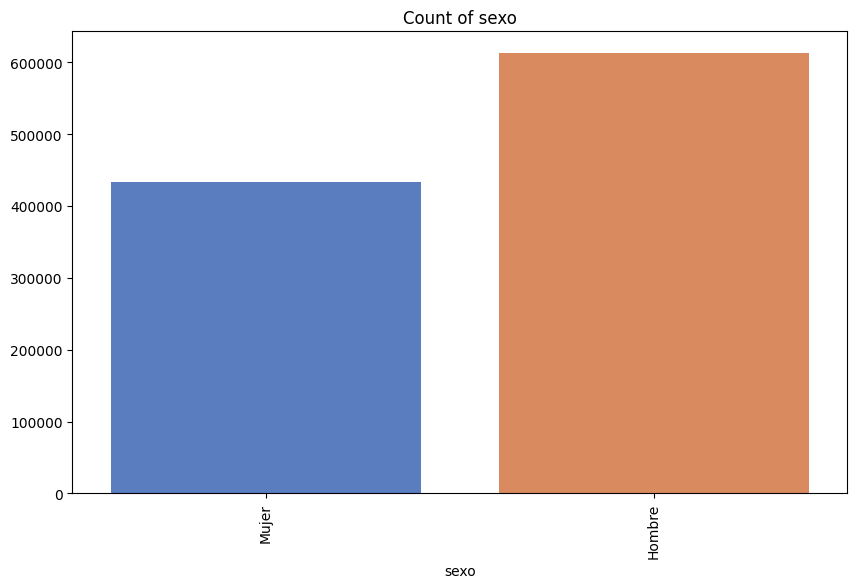

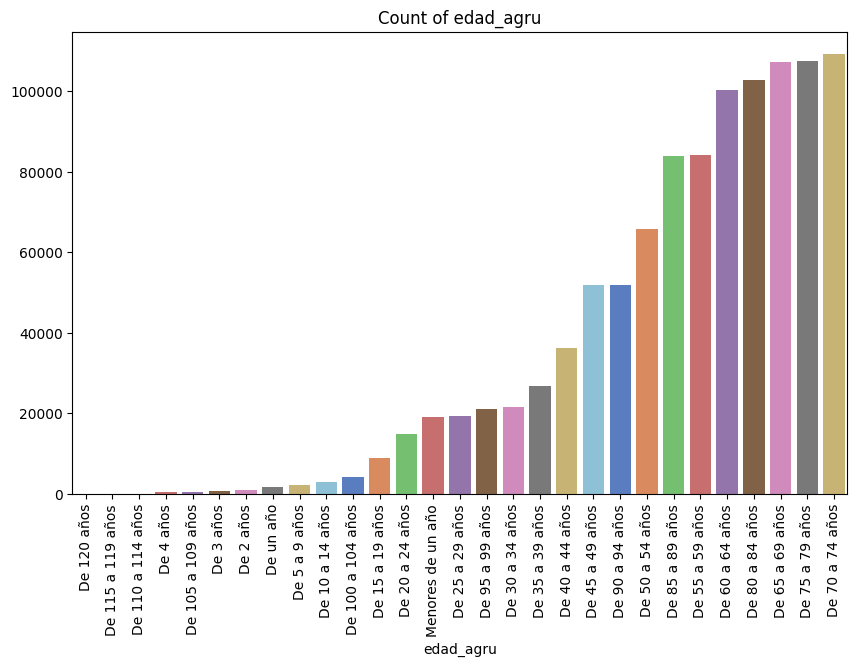

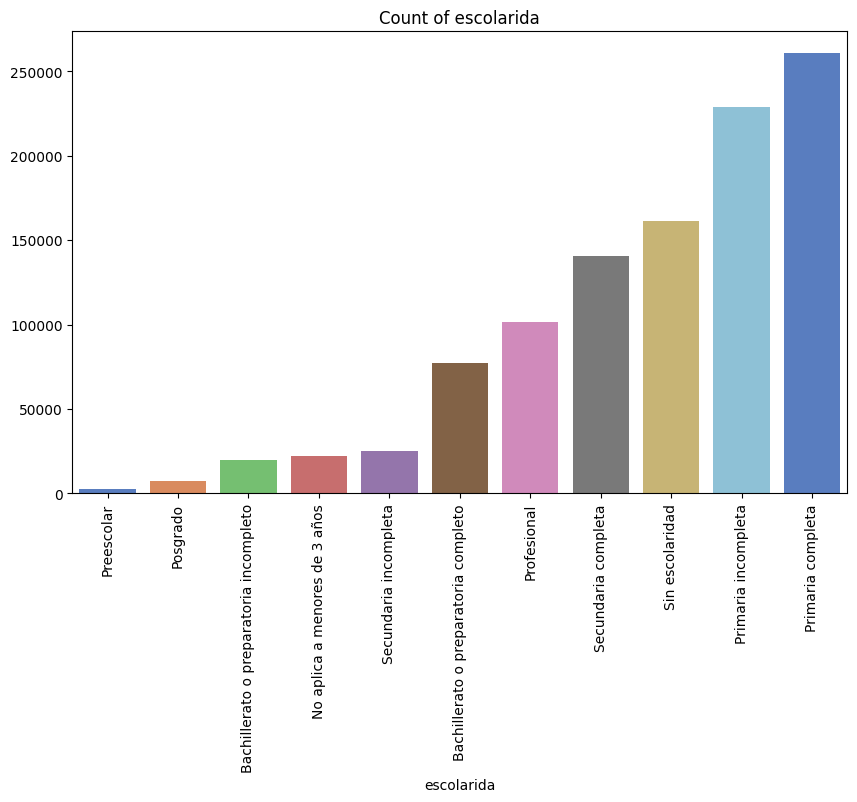

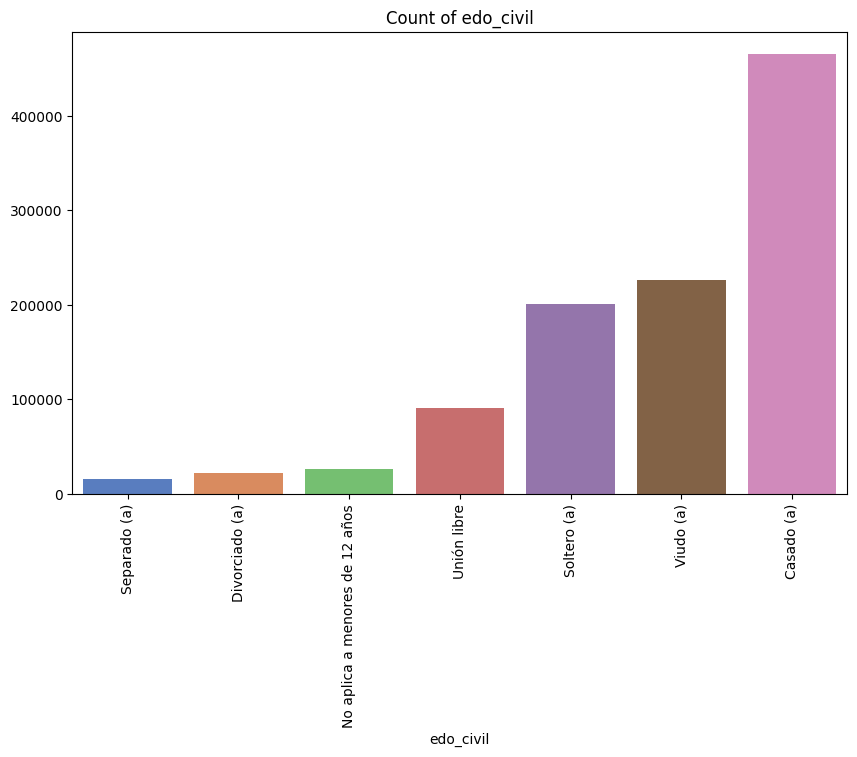

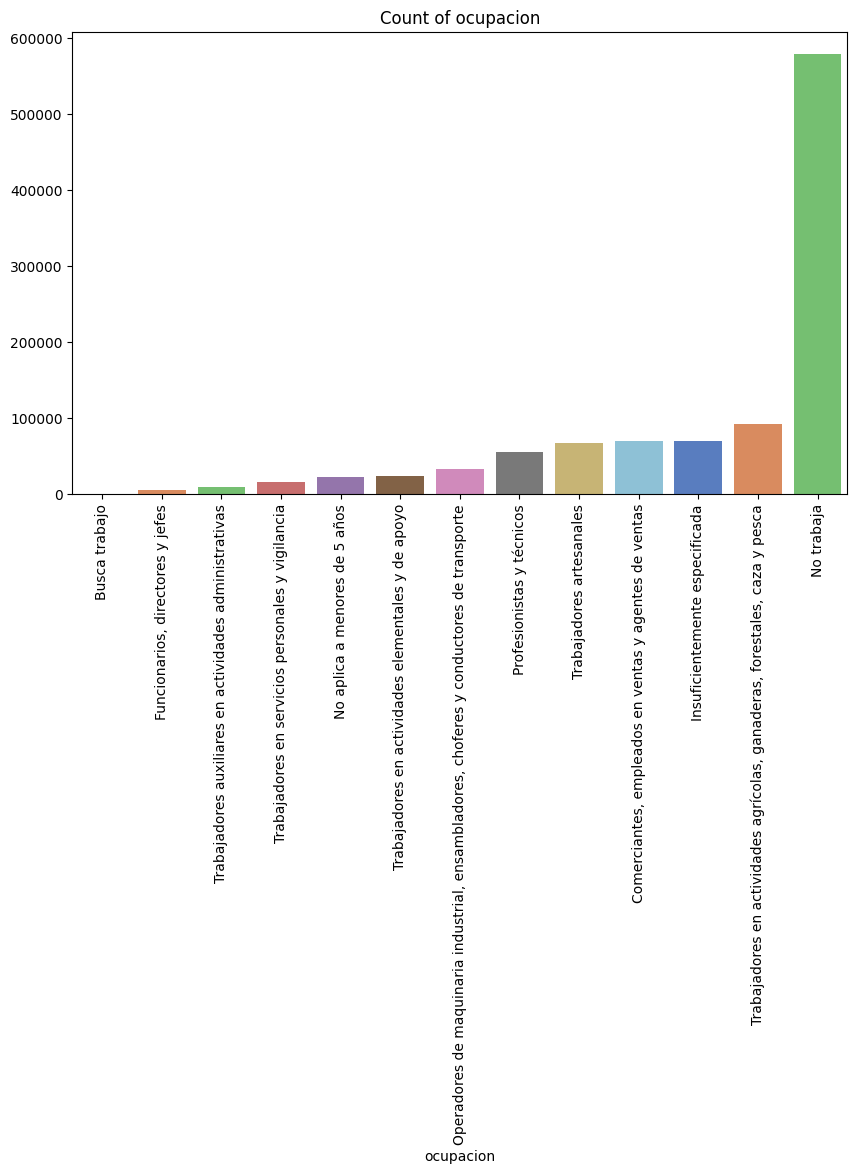

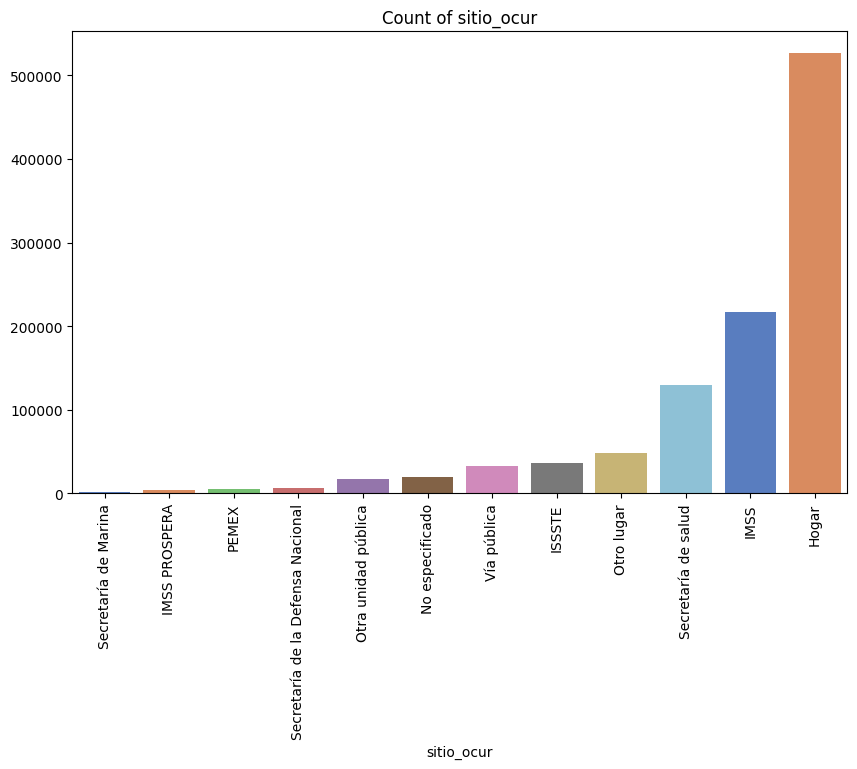

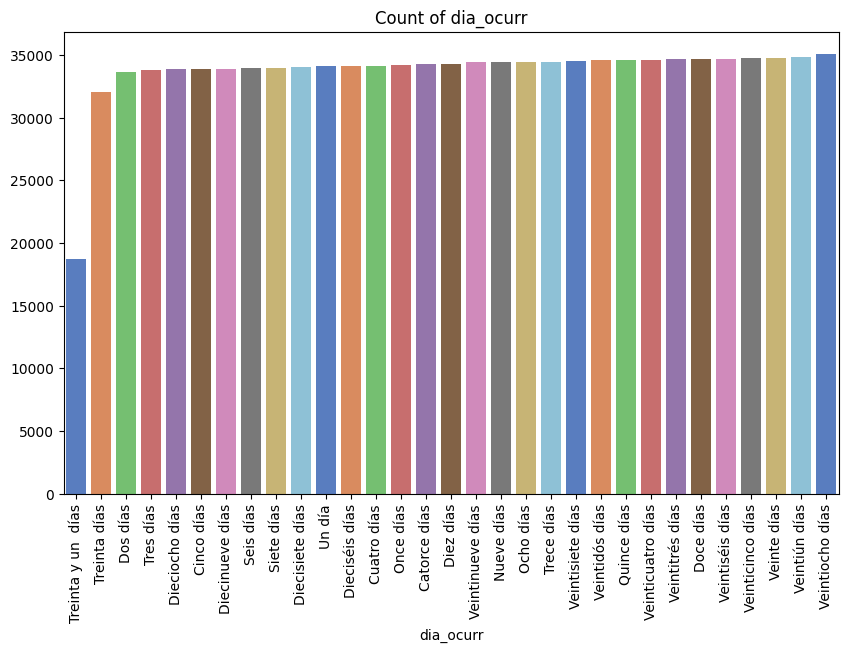

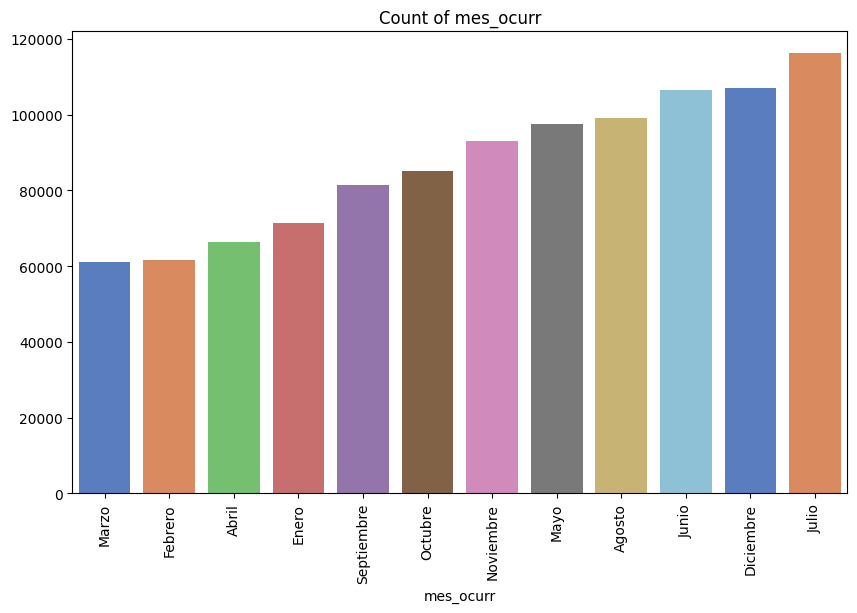

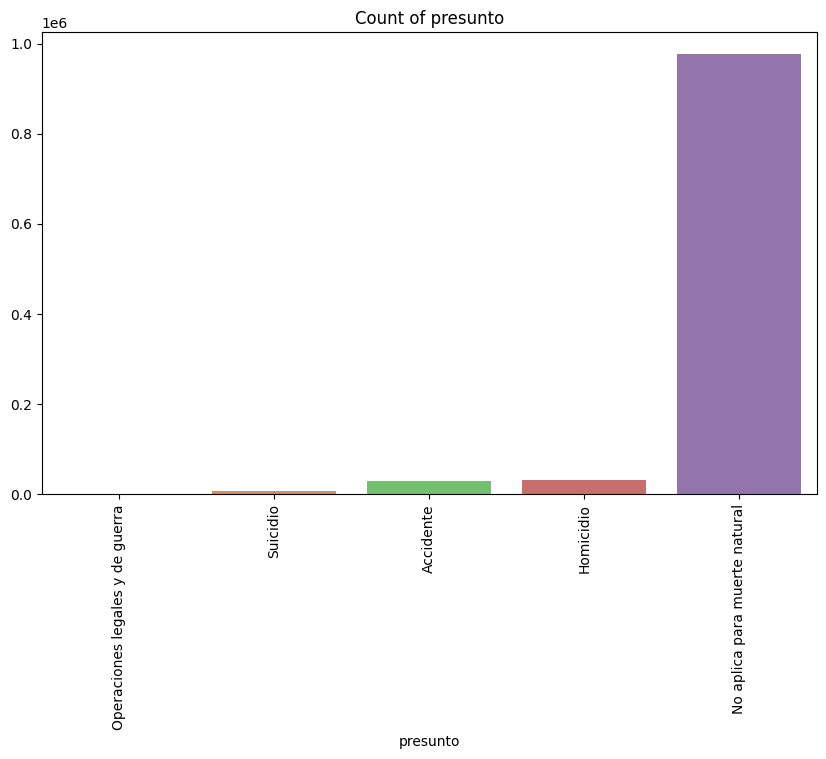

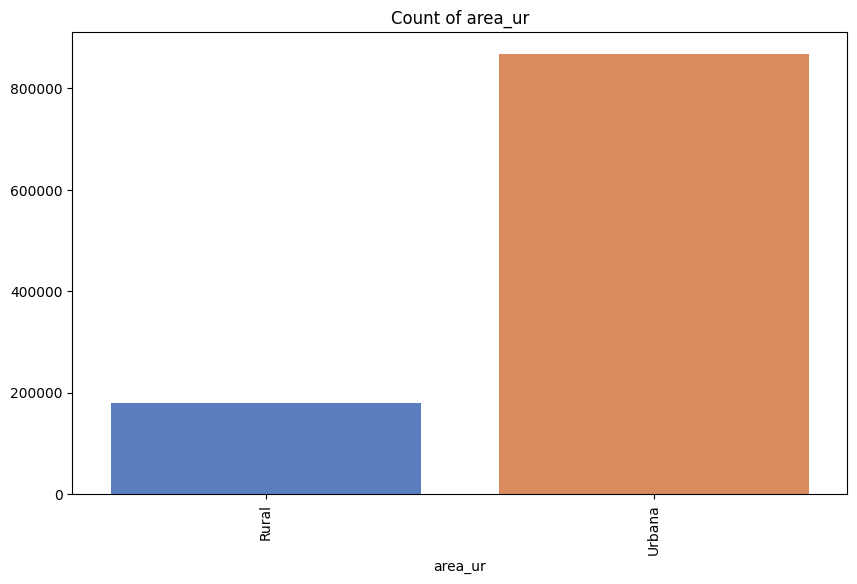

In [26]:
#Ahora se hace un countplot de las variables

for col in interest_columns:
    if col in ["edad", "causa_def", "lista_mex","anio_ocur", "par_agre", "ent_regis", "ent_ocurr", "ent_resid"]:
        continue
    
    # Calcular los conteos y ordenar por estos conteos
    count_data = data[col].value_counts().sort_values()

    plt.figure(figsize=(10, 6))
    plt.tick_params(axis='x', rotation=90)
    sns.barplot(x=count_data.index, y=count_data.values, palette="muted")
    plt.title("Count of " + col)
    plt.show()

In [27]:
#Porcentaje de personas con sexo hombre 
hombres = data[data["sexo"] ==  'Hombre']
porcentaje_hombres = ((hombres.shape[0])/(data.shape[0]))*100

porcentaje_hombres

58.54471003071124

In [28]:
#Porcentaje de personas que fallecen en Julio
enero = data[data["mes_ocurr"] ==  'Julio']
porcentaje_julio = ((enero.shape[0])/(data.shape[0]))*100

porcentaje_julio

11.102402320021946

In [30]:
#Promedio de porcentaje que fallecen por mes 
meses = ["Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio", "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre"]

sum_porcentajes = 0

for i in meses:
    mes_df = data[data["mes_ocurr"] == i]
    sum_porcentajes += (mes_df.shape[0])/(data.shape[0])
    
porcentaje_promedio_mes = (sum_porcentajes/12)*100

porcentaje_promedio_mes

8.333333333333336

<div style="text-align: justify">

De las gráficas anteriores se pueden obtener diferentes conclusiones.

En primer lugar es impportante mencionar que por ejemplo de la gráfica de estado civil, la concentración esta en casado (a) y tal vez se podría pensar que si eres casado tienes más probabilidades de morir, pero esto tiene otra explicación y es que si vemos los datos la cantidad de personas fallecidas de más de 60 años es mucho mayor a las de menos de 60 y esto tiene que ver con que entre mas grande seas mas probable es que tu estado civil sea casado.
Este mismo efecto sucede en las gráficas de área urbana o rural, de nivel educativo, entidad y ocupación.

Aunque un efecto muy interesante es que una gran parte, siendo concretos, del 100% de las personas fallecidas, un 58.54% son hombres.
Además el mes en el que mas muertes ocurren es Junio con un 11.1% del total de muertes cuando el promedio por mes es del 8.33%.


</div>

## Defunciones violentas (Homicidios)

Para analizar de manera correcta las variables de **presunto agresor** y de **presunta defunción violenta** hay que eliminar aquellos datos que no hayan ocurrido en estas circunstancias. 

In [31]:
data_presunto = data[data["presunto"] != "No aplica para muerte natural"]

data_presunto

,sexo,edad,edad_agru,escolarida,edo_civil,ocupacion,sitio_ocur,causa_def,lista_mex,ent_regis,ent_ocurr,ent_resid,dia_ocurr,mes_ocurr,anio_ocur,presunto,par_agre,area_ur
30,Hombre,Veinticuatro años,De 20 a 24 años,Profesional,Soltero (a),Profesionistas y técnicos,Hogar,X700,Lesiones autoinfligidas intencionalmente,Aguascalientes,Aguascalientes,Aguascalientes,Trece días,Enero,Año 2020,Suicidio,No aplica,Urbana
50,Hombre,Cincuenta y nueve años,De 55 a 59 años,Primaria completa,Casado (a),Trabajadores en actividades elementales y de a...,Hogar,X700,Lesiones autoinfligidas intencionalmente,Aguascalientes,Aguascalientes,Aguascalientes,Trece días,Enero,Año 2020,Suicidio,No aplica,Rural
51,Hombre,Cuarenta y siete años,De 45 a 49 años,Profesional,Casado (a),Profesionistas y técnicos,IMSS,V496,Accidentes de tráfico de vehículos de motor,Aguascalientes,Aguascalientes,Aguascalientes,Quince días,Enero,Año 2020,Accidente,No aplica,Rural
52,Hombre,Treinta y seis años,De 35 a 39 años,Primaria incompleta,Unión libre,Trabajadores artesanales,Hogar,X700,Lesiones autoinfligidas intencionalmente,Aguascalientes,Aguascalientes,Aguascalientes,Veinticuatro días,Enero,Año 2020,Suicidio,No aplica,Urbana
57,Hombre,Cincuenta y seis años,De 55 a 59 años,Bachillerato o preparatoria completo,Casado (a),"Operadores de maquinaria industrial, ensamblad...",Vía pública,V439,Accidentes de tráfico de vehículos de motor,Aguascalientes,Aguascalientes,Aguascalientes,Siete días,Enero,Año 2020,Accidente,No aplica,Urbana
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1086586,Hombre,Cuarenta y cinco años,De 45 a 49 años,Primaria incompleta,Casado (a),Insuficientemente especificada,No especificado,X959,Agresiones (homicidios),Zacatecas,Zacatecas,Zacatecas,Treinta y un días,Diciembre,Año 2020,Homicidio,No especificado,Urbana
1086587,Hombre,Veinticinco años,De 25 a 29 años,Bachillerato o preparatoria completo,Unión libre,Trabajadores en actividades elementales y de a...,Otro lugar,X954,Agresiones (homicidios),Zacatecas,Zacatecas,Zacatecas,Treinta y un días,Diciembre,Año 2020,Homicidio,No especificado,Urbana
1086588,Hombre,Treinta y ocho años,De 35 a 39 años,Primaria completa,Unión libre,Insuficientemente especificada,No especificado,X959,Agresiones (homicidios),Zacatecas,Zacatecas,Zacatecas,Treinta y un días,Diciembre,Año 2020,Homicidio,No especificado,Urbana
1086589,Hombre,Veinticinco años,De 25 a 29 años,Secundaria completa,Casado (a),"Comerciantes, empleados en ventas y agentes de...",No especificado,X919,Agresiones (homicidios),Zacatecas,Zacatecas,Zacatecas,Veintiún días,Noviembre,Año 2020,Homicidio,No especificado,Urbana


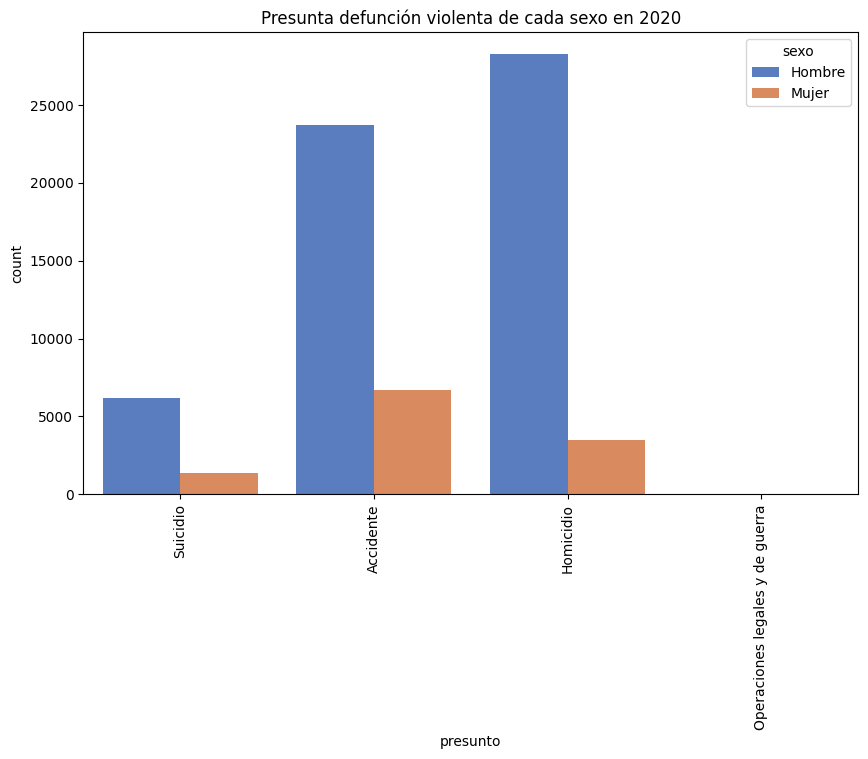

In [32]:
plt.figure(figsize=(10, 6))
plt.title("Presunta defunción violenta de cada sexo en 2020")
plt.tick_params(axis='x', rotation=90)

sns.countplot(data=data_presunto, x="presunto", palette="muted", hue="sexo")
plt.show()

In [68]:
accidente = data_presunto[data_presunto["presunto"] ==  'Accidente']
accidente_n = accidente.shape[0]


homicidio = data_presunto[data_presunto["presunto"] ==  'Homicidio']
homicidio_n = homicidio.shape[0]

suicidio = data_presunto[data_presunto["presunto"] ==  'Suicidio']
suicidio_n = suicidio.shape[0]

print("Accidente:", accidente_n)
print("Homicidio:", homicidio_n)
print("Suicidio:", suicidio_n)

Accidente: 30364
Homicidio: 31738
Suicidio: 7560


In [67]:
non_reg_hom = homicidio[homicidio["par_agre"] == "No especificado"].shape[0]
reg_hom = homicidio.shape[0] - non_reg_hom
print("Numero de homicidios sin parenteso agresor registrado: ", non_reg_hom)
print("Numero de homicidios con parenteso agresor registrado: ", reg_hom)
print("Porcentaje registrados: ", (reg_hom/(homicidio_n))*100)

Numero de homicidios sin parenteso agresor registrado:  31556
Numero de homicidios con parenteso agresor registrado:  182
Porcentaje registrados:  0.5734450816056462


<div style="text-align: justify">

Los datos nos dicen que 30364 personas murieron por accidente y alrededor de otras 31738 fueron homicidios.


Además los datos nos muestran que por una gran mayoría los hombres tienden a tener más accidentes, tener mayor número de homicidios así como más suicidios.

Por otro lado es importante mencionar que solo un 0.5% de los homicidios registrados se conoce el parentesco del agresor y el resto tiene a un 'No especificado'.
</div>

## Defunciones violentas (Suicidios)

Si se analiza al grupo de personas que lamentablemente cometieron suicidio durante el 2020, se puede obtener lo siguiente.

In [35]:
suicidios = data_presunto[data_presunto["presunto"] ==  'Suicidio']

suicidios

,sexo,edad,edad_agru,escolarida,edo_civil,ocupacion,sitio_ocur,causa_def,lista_mex,ent_regis,ent_ocurr,ent_resid,dia_ocurr,mes_ocurr,anio_ocur,presunto,par_agre,area_ur
30,Hombre,Veinticuatro años,De 20 a 24 años,Profesional,Soltero (a),Profesionistas y técnicos,Hogar,X700,Lesiones autoinfligidas intencionalmente,Aguascalientes,Aguascalientes,Aguascalientes,Trece días,Enero,Año 2020,Suicidio,No aplica,Urbana
50,Hombre,Cincuenta y nueve años,De 55 a 59 años,Primaria completa,Casado (a),Trabajadores en actividades elementales y de a...,Hogar,X700,Lesiones autoinfligidas intencionalmente,Aguascalientes,Aguascalientes,Aguascalientes,Trece días,Enero,Año 2020,Suicidio,No aplica,Rural
52,Hombre,Treinta y seis años,De 35 a 39 años,Primaria incompleta,Unión libre,Trabajadores artesanales,Hogar,X700,Lesiones autoinfligidas intencionalmente,Aguascalientes,Aguascalientes,Aguascalientes,Veinticuatro días,Enero,Año 2020,Suicidio,No aplica,Urbana
59,Hombre,Cuarenta y dos años,De 40 a 44 años,Bachillerato o preparatoria completo,Casado (a),"Funcionarios, directores y jefes",Hogar,X740,Lesiones autoinfligidas intencionalmente,Aguascalientes,Aguascalientes,Aguascalientes,Siete días,Enero,Año 2020,Suicidio,No aplica,Urbana
94,Hombre,Cuarenta y seis años,De 45 a 49 años,Secundaria completa,Casado (a),Trabajadores en actividades elementales y de a...,Otro lugar,X708,Lesiones autoinfligidas intencionalmente,Aguascalientes,Aguascalientes,Aguascalientes,Veintitrés días,Enero,Año 2020,Suicidio,No aplica,Urbana
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1085797,Hombre,Treinta y siete años,De 35 a 39 años,Profesional,Soltero (a),Profesionistas y técnicos,Hogar,X700,Lesiones autoinfligidas intencionalmente,Zacatecas,Zacatecas,Zacatecas,Quince días,Octubre,Año 2020,Suicidio,No aplica,Urbana
1085980,Hombre,Veinticinco años,De 25 a 29 años,Primaria completa,Soltero (a),No trabaja,Hogar,X700,Lesiones autoinfligidas intencionalmente,Zacatecas,Zacatecas,Zacatecas,Veinticuatro días,Octubre,Año 2020,Suicidio,No aplica,Urbana
1086031,Hombre,Veinticuatro años,De 20 a 24 años,Bachillerato o preparatoria completo,Casado (a),Trabajadores auxiliares en actividades adminis...,Hogar,X700,Lesiones autoinfligidas intencionalmente,Zacatecas,Zacatecas,Zacatecas,Veintidós días,Septiembre,Año 2020,Suicidio,No aplica,Urbana
1086509,Hombre,Veintitrés años,De 20 a 24 años,Primaria incompleta,Unión libre,Insuficientemente especificada,Otro lugar,X708,Lesiones autoinfligidas intencionalmente,Zacatecas,Zacatecas,Zacatecas,Veinticuatro días,Febrero,Año 2020,Suicidio,No aplica,Rural


In [36]:
#Nos quedamos únicamente con los 5 grupos de edad más comúnes.

dict_common_suicidio = suicidios["edad_agru"].value_counts().head(5).to_dict()


list_common_suicidio = list(dict_common_suicidio.keys())

suicidios_rec = pd.DataFrame()

suicidios_rec = suicidios[suicidios["edad_agru"].isin(list_common_suicidio)]

suicidios_rec["edad_agru"].value_counts()


edad_agru
De 25 a 29 años    1117
De 20 a 24 años    1097
De 15 a 19 años     867
De 30 a 34 años     861
De 35 a 39 años     797
Name: count, dtype: int64

<div style="text-align: justify">

Los grupos de edad más comunes son de 25 a 29 años, 20 a 24 años, 30 a 34 años y 15 a 29 años, por lo que el rango de edades entre 15 a 34 años ocupa la mayor cantidad de suicidios en México.


</div>

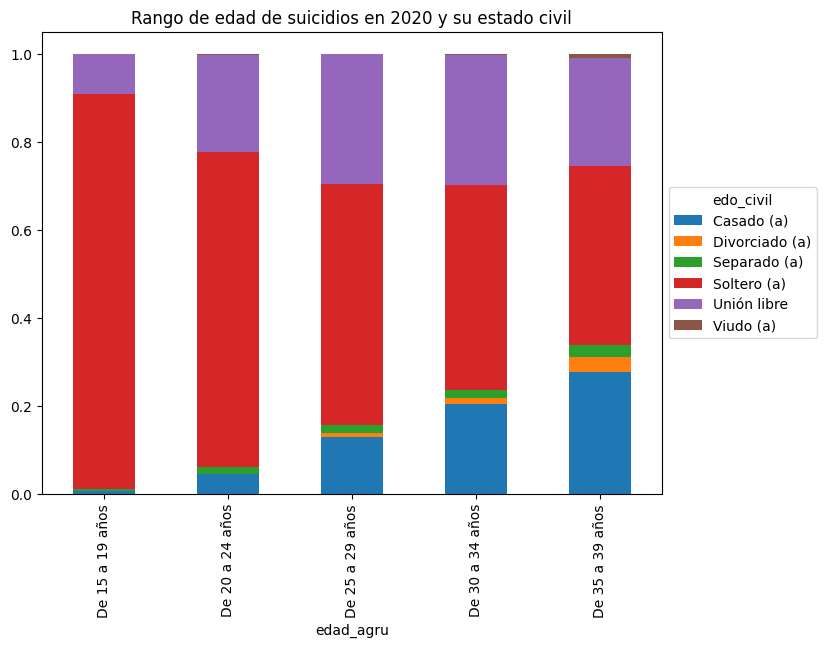

In [37]:
#Graficando por los 5 grupos de edad con mayores suicidios su proporción de estado civil.

PROP = pd.crosstab(suicidios_rec["edad_agru"], data['edo_civil'])
ax = PROP.div(PROP.sum(1).astype('float'), axis=0).plot(kind='bar', stacked=True, figsize=(8,6), title='Rango de edad de suicidios en 2020 y su estado civil')

# Mover la leyenda fuera del gráfico
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title='edo_civil')

plt.show()

<div style="text-align: justify">
Un gran porcentaje de las personas que cometieron suicidio eran solteros, aunque conforme la edad va aumentando, también lo hace el porcentaje de las personas que cometieron suicidio y eran casados.

</div>

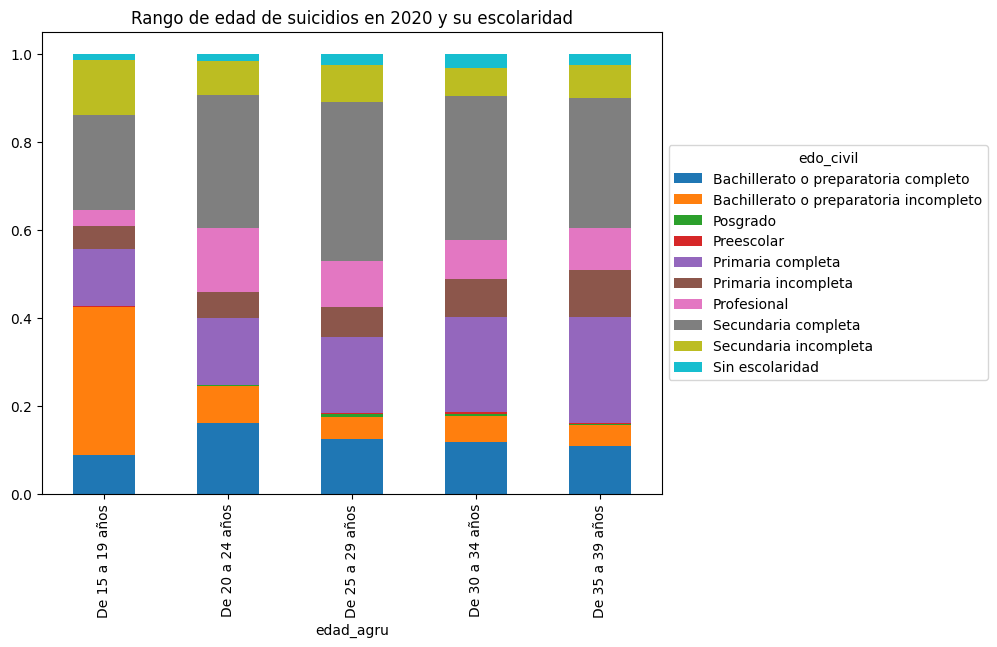

In [38]:
#Graficando por los 5 grupos de edad con mayores suicidios su nivel de escolaridad

PROP = pd.crosstab(suicidios_rec["edad_agru"], data['escolarida'])
ax = PROP.div(PROP.sum(1).astype('float'), axis=0).plot(kind='bar', stacked=True, figsize=(8,6), title='Rango de edad de suicidios en 2020 y su escolaridad')

# Mover la leyenda fuera del gráfico
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title='edo_civil')

plt.show()

In [72]:
porc_suic_sec = (suicidio[suicidio["escolarida"] == "Secundaria completa"].shape[0]/suicidio_n)*100

porc_suic_sec

26.746031746031747

<div style="text-align: justify">
Algunos grupos de edad están muy relacionados con el nivel educativo en el que se encuentran por la edad, como preparatoria para 15 a 19 años. Aunque el grupo que destaca sobre todos son los que tenían de nivel educativo solo la secundaria, representando ellos un 26.74% del total de suicidios en México, casi una tercera parte.
</div>

Ahora se analizará la ocupación de estas personas así como su nivel educativo

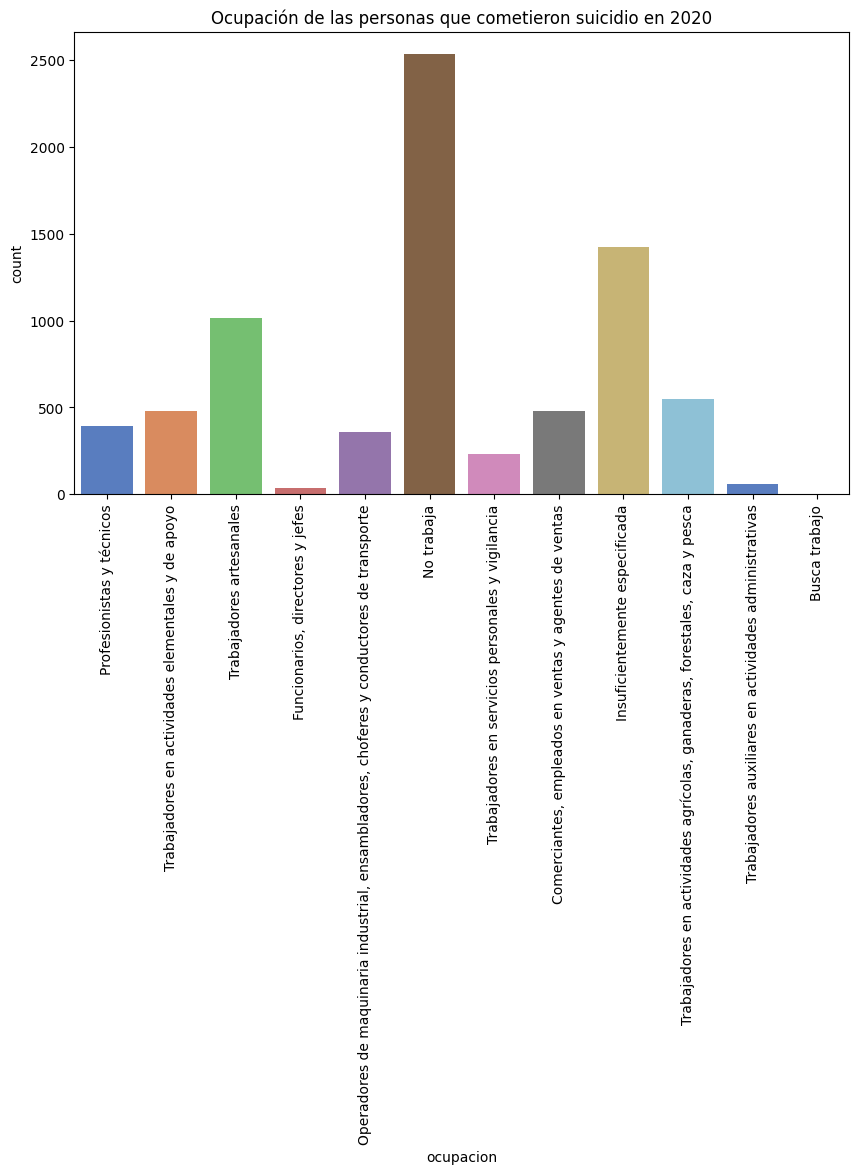

In [39]:
plt.figure(figsize=(10, 6))
plt.title("Ocupación de las personas que cometieron suicidio en 2020")
sns.countplot(data=suicidios, x="ocupacion", palette="muted", )
plt.tick_params(axis='x', rotation=90)

plt.show()

<div style="text-align: justify">
Es curioso ver como la mayoría de las personas que cometieron suicidio no tenían trabajo y existe una gran parte poco especificada.

Por otro lado la ocupación que sigue en la lista son los Trabajadores artesanales. 

Además de que los funcionarios, directores y jefes tienen la menor incidencia, así como los trabajadores auxiliares en actividades administrativas.
</div>

## Análisis por entidad federativa

Si se realiza un análisis por cantidad de personas fallecidas en cada entidad de registro, ocurrencia y residencia se obtiene lo siguiente:

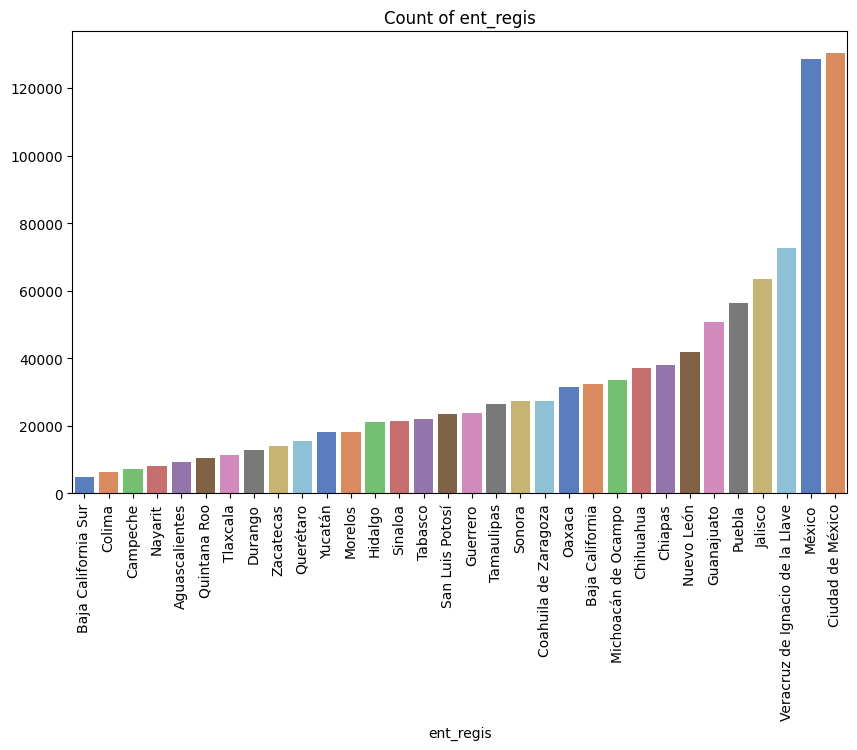

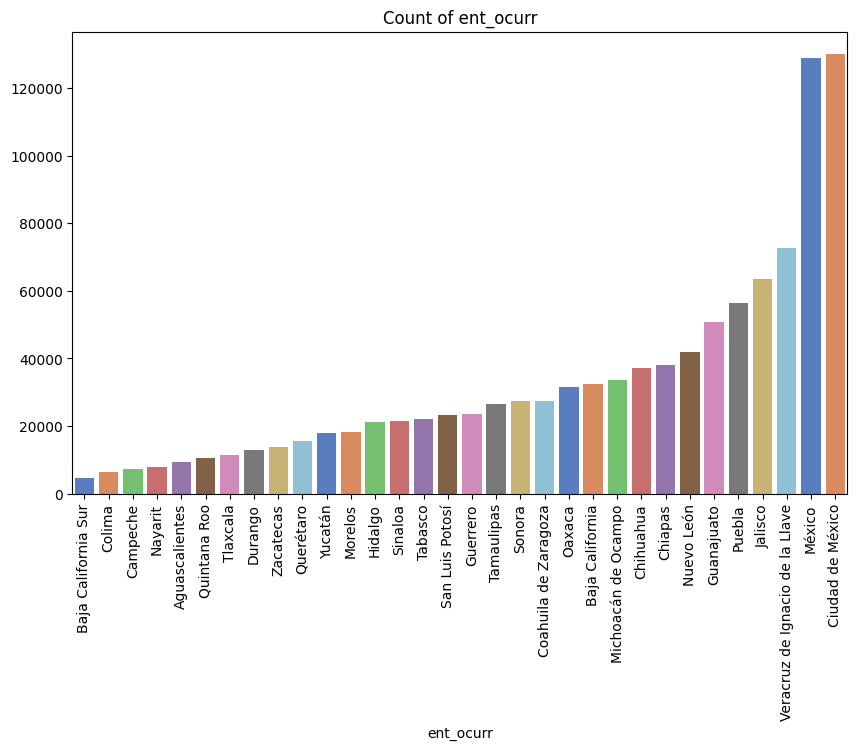

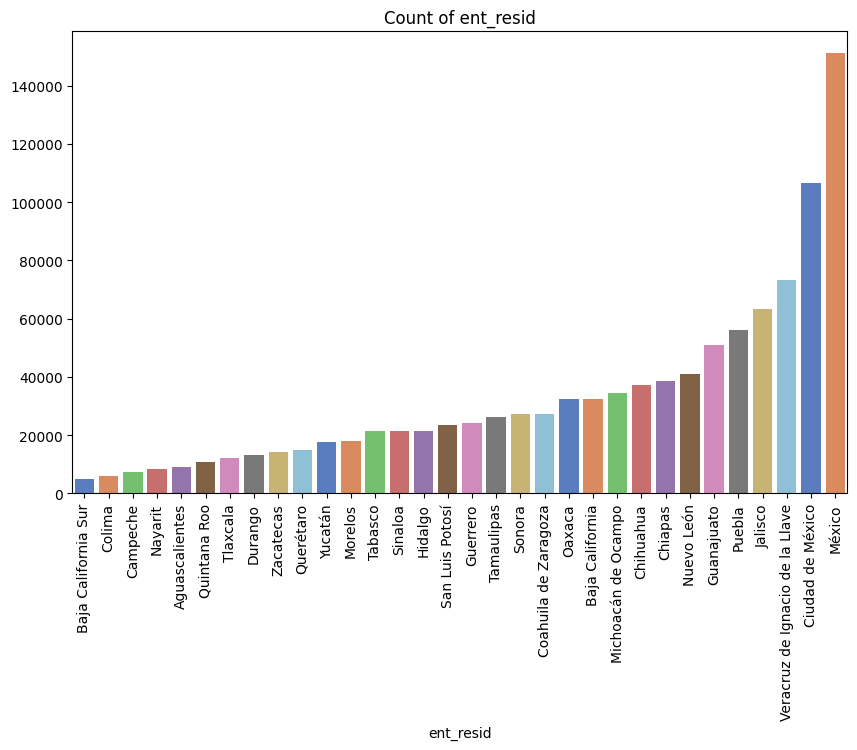

In [40]:
#Graficando el conteo de fallecimientos totales por entidad federativa.
for ent in ["ent_regis", "ent_ocurr", "ent_resid"]:
    count_data = data[ent].value_counts().sort_values()
    plt.figure(figsize=(10, 6))
    plt.tick_params(axis='x', rotation=90)
    sns.barplot(x=count_data.index, y=count_data.values, palette="muted")
    plt.title("Count of " + ent)
    plt.show()

<div style="text-align: justify">
Para un análisis mas profundo se realizará una estimación por entidad de acuerdo al valor de n° de ocurrencias por cada 100,000 habitantes en las entidades. Por ejemplo la Ciudad de México tiene mayores fallecimientos que Baja California Sur, pero esto debido a que tiene mucha mas población, por lo que a continación se ajusta a este nuevo valor.
</div>

De acuerdo al recuento poblacional del 2020 recopilada por [INEGI](https://www.inegi.org.mx/app/tabulados/interactivos/?pxq=Poblacion_Poblacion_01_e60cd8cf-927f-4b94-823e-972457a12d4b), se tienen los siguientes datos para la población por estado:

| Estado                               | Población      |
|--------------------------------------|----------------|
| Estados Unidos Mexicanos             | 126,014,024    |
| Aguascalientes                       | 1,425,607      |
| Baja California                      | 3,769,020      |
| Baja California Sur                  | 798,447        |
| Campeche                             | 928,363        |
| Coahuila de Zaragoza                 | 3,146,771      |
| Colima                               | 731,391        |
| Chiapas                              | 5,543,828      |
| Chihuahua                            | 3,741,869      |
| Ciudad de México                     | 9,209,944      |
| Durango                              | 1,832,650      |
| Guanajuato                           | 6,166,934      |
| Guerrero                             | 3,540,685      |
| Hidalgo                              | 3,082,841      |
| Jalisco                              | 8,348,151      |
| México                               | 16,992,418     |
| Michoacán de Ocampo                  | 4,748,846      |
| Morelos                              | 1,971,520      |
| Nayarit                              | 1,235,456      |
| Nuevo León                           | 5,784,442      |
| Oaxaca                               | 4,132,148      |
| Puebla                               | 6,583,278      |
| Querétaro                            | 2,368,467      |
| Quintana Roo                         | 1,857,985      |
| San Luis Potosí                      | 2,822,255      |
| Sinaloa                              | 3,026,943      |
| Sonora                               | 2,944,840      |
| Tabasco                              | 2,402,598      |
| Tamaulipas                           | 3,527,735      |
| Tlaxcala                             | 1,342,977      |
| Veracruz de Ignacio de la Llave      | 8,062,579      |
| Yucatán                              | 2,320,898      |
| Zacatecas                            | 1,622,138      |

In [41]:
#La recopilación de los datos anteriores se encuentra resumida en el siguiente diccionario:

poblacion_estados = {
    "Aguascalientes": 1425607,
    "Baja California": 3769020,
    "Baja California Sur": 798447,
    "Campeche": 928363,
    "Coahuila de Zaragoza": 3146771,
    "Colima": 731391,
    "Chiapas": 5543828,
    "Chihuahua": 3741869,
    "Ciudad de México": 9209944,
    "Durango": 1832650,
    "Guanajuato": 6166934,
    "Guerrero": 3540685,
    "Hidalgo": 3082841,
    "Jalisco": 8348151,
    "México": 16992418,
    "Michoacán de Ocampo": 4748846,
    "Morelos": 1971520,
    "Nayarit": 1235456,
    "Nuevo León": 5784442,
    "Oaxaca": 4132148,
    "Puebla": 6583278,
    "Querétaro": 2368467,
    "Quintana Roo": 1857985,
    "San Luis Potosí": 2822255,
    "Sinaloa": 3026943,
    "Sonora": 2944840,
    "Tabasco": 2402598,
    "Tamaulipas": 3527735,
    "Tlaxcala": 1342977,
    "Veracruz de Ignacio de la Llave": 8062579,
    "Yucatán": 2320898,
    "Zacatecas": 1622138
}

In [42]:
# se crea una lista con los nombres de los estados
entidades = list(columns_info_dict["ent_ocurr"].values())

entidades.remove('Estados unidos de América')
entidades.remove('Otros países de Latinoamérica')
entidades.remove('Otros países')
entidades.remove('Entidad no aplica para A00 - R99 Y V90 - Y89')
entidades.remove('Entidad no especificada')

In [43]:
#Ahora se agrega una nueva columa al dataFrame, siendo esta la tasa de mortalidad por cada 100,000 habitantes
tasas_ent_ocurr = {}
tasas_ent_regis = {}
tasas_ent_resid = {}

for state in entidades:

    tasas_ent_ocurr[state] =((data[data["ent_ocurr"] == state].shape[0]/poblacion_estados[state])*100000)
    tasas_ent_regis[state] =((data[data["ent_regis"] == state].shape[0]/poblacion_estados[state])*100000)
    tasas_ent_resid[state] =((data[data["ent_resid"] == state].shape[0]/poblacion_estados[state])*100000)

In [44]:
#Se crea un dataframe con los valores de las tasas por cada entidad federativa
tasas_total = pd.DataFrame({"tasas_ent_resid": tasas_ent_resid, "tasas_ent_ocurr":tasas_ent_ocurr, "tasas_ent_regis": tasas_ent_regis})

tasas_total

,tasas_ent_resid,tasas_ent_ocurr,tasas_ent_regis
Aguascalientes,639.236480,665.260482,659.648837
Baja California,857.994916,858.843944,859.241925
Baja California Sur,600.165070,595.030102,595.030102
Campeche,787.730661,773.404369,773.404369
Coahuila de Zaragoza,865.236142,870.765620,866.825072
Colima,825.140041,856.723695,856.586969
Chiapas,696.215683,686.799807,687.016264
Chihuahua,993.086610,991.937452,991.616756
Ciudad de México,1155.826789,1413.439647,1413.949965
Durango,720.486727,700.188252,708.045726


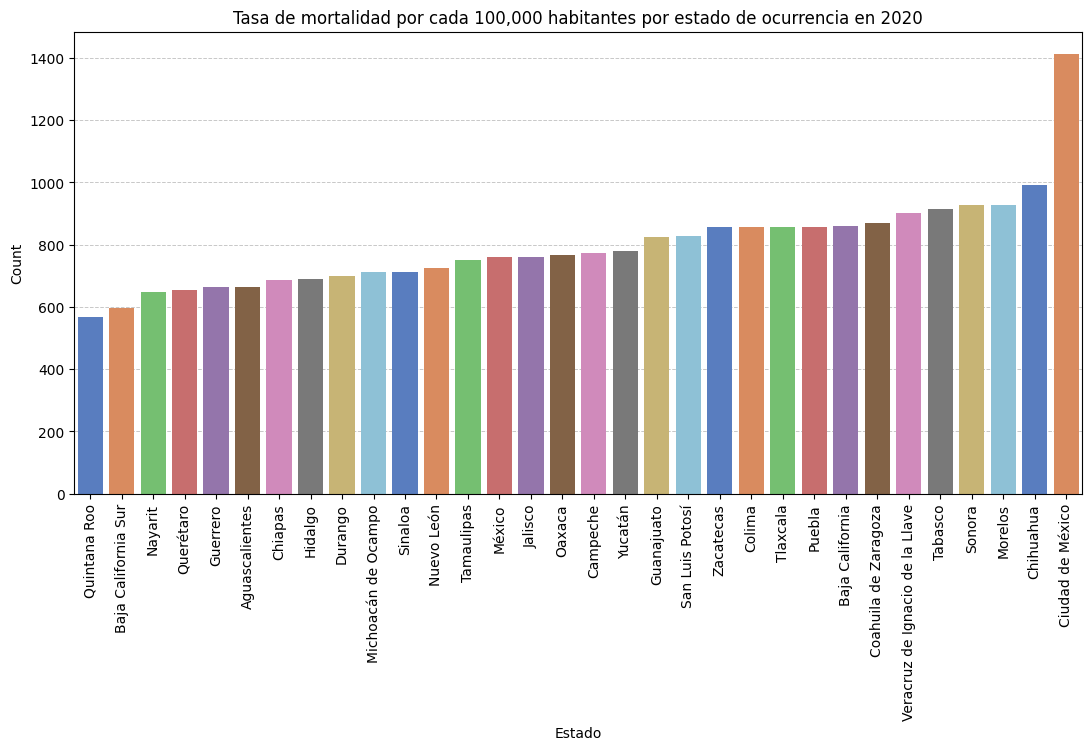

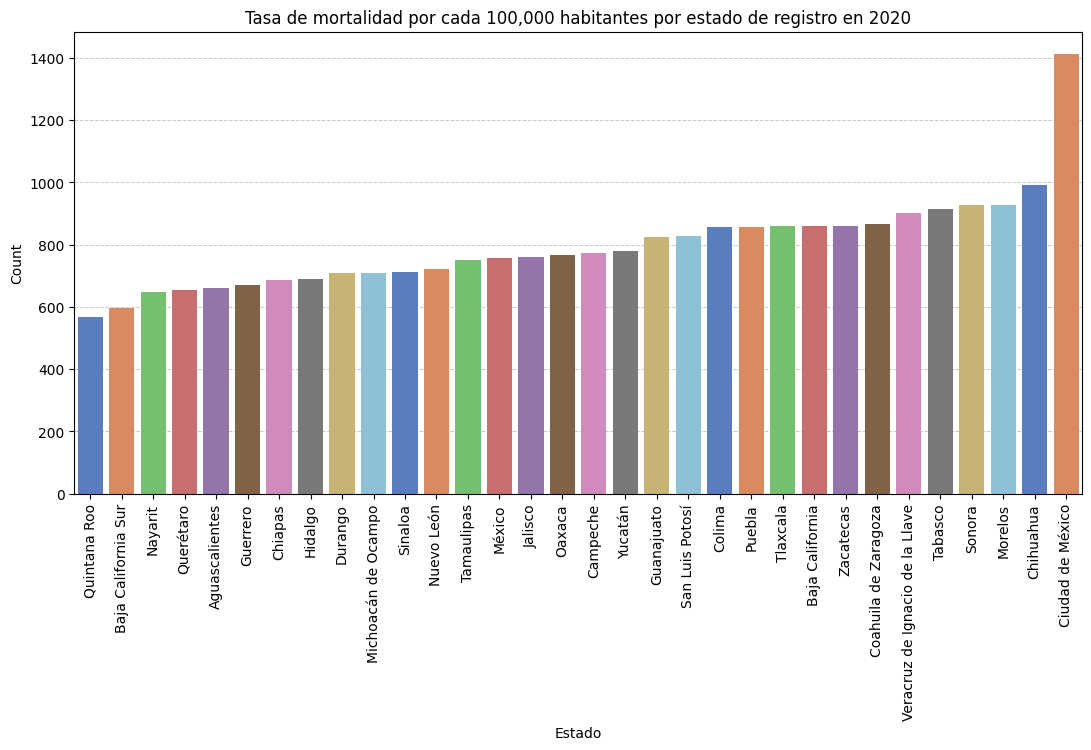

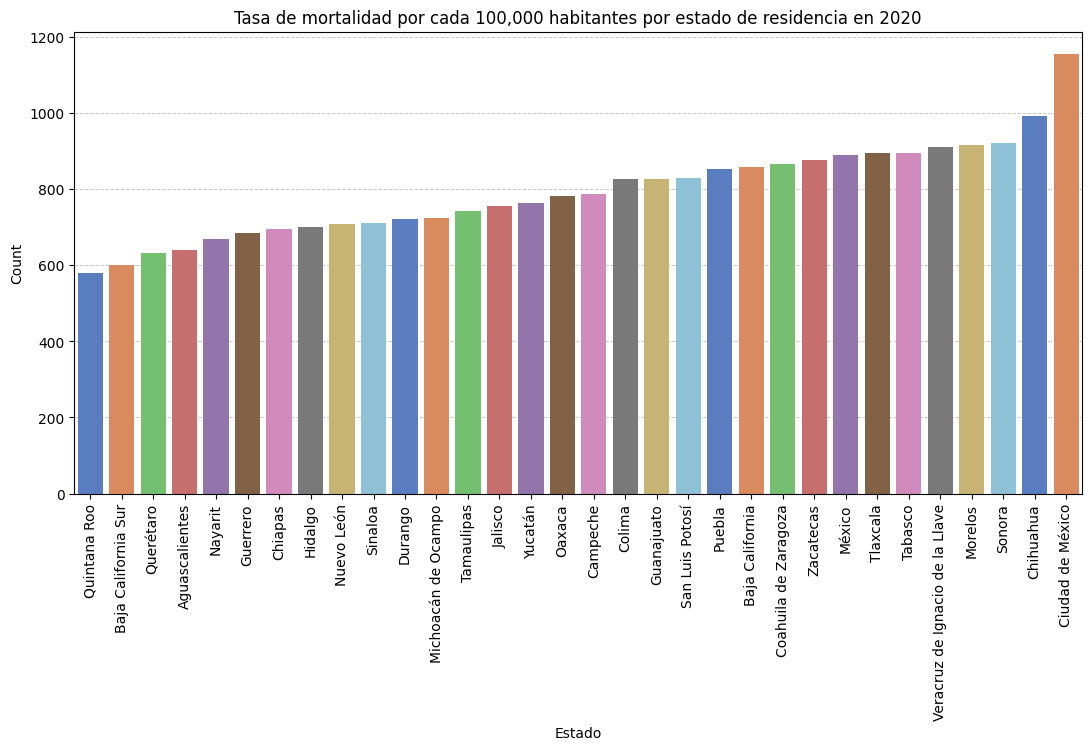

In [45]:
#Se itera por ocurrencia, registro y residencia para mostrar las tasas por cada 100,000 habitantes
names_tasas = ["ocurrencia", "registro", "residencia"]

for i, col in enumerate(["tasas_ent_ocurr", "tasas_ent_regis", "tasas_ent_resid"]):
    plt.figure(figsize=(13, 6))
    count_data = tasas_total[[col]].sort_values(by=col)
    ax = sns.barplot(x=count_data.index, y=count_data[col], palette="muted")
    plt.tick_params(axis='x', rotation=90)
    plt.title("Tasa de mortalidad por cada 100,000 habitantes por estado de " + names_tasas[i]+ " en 2020")
    plt.ylabel("Count")
    plt.xlabel("Estado")
    plt.grid(True, axis='y', linestyle='--', linewidth=0.7, alpha=0.7)  # Configurar grid
    ax.set_axisbelow(True)  # Asegurar que el grid esté debajo de las barras
    plt.show()

Ahora se calcularán las gráficas para homicidios, suicidios y accidentes por estado.

In [46]:
tasas_ent_acci = {}
tasas_ent_suic = {}
tasas_ent_homi = {}

for state in entidades:
    
    tasas_ent_acci[state] =((data[ (data["ent_ocurr"] == state) & (data["presunto"] == "Accidente")].shape[0]/poblacion_estados[state])*100000)
    tasas_ent_suic[state] =((data[ (data["ent_ocurr"] == state) & (data["presunto"] == "Suicidio")].shape[0]/poblacion_estados[state])*100000)
    tasas_ent_homi[state] =((data[ (data["ent_ocurr"] == state) & (data["presunto"] == "Homicidio")].shape[0]/poblacion_estados[state])*100000)

In [47]:
#Se crea un dataframe con los valores de las tasas de presuntos por cada entidad federativa
tasas_presunto = pd.DataFrame({"tasas_ent_acci": tasas_ent_acci, "tasas_ent_suic":tasas_ent_suic, "tasas_ent_homi": tasas_ent_homi})

tasas_presunto

,tasas_ent_acci,tasas_ent_suic,tasas_ent_homi
Aguascalientes,29.250698,12.696346,6.313100
Baja California,36.163247,2.600145,49.641551
Baja California Sur,24.171924,8.266046,7.264101
Campeche,26.175106,7.647870,7.540154
Coahuila de Zaragoza,24.247077,8.484888,7.467973
Colima,34.728346,7.246466,81.215109
Chiapas,15.440594,3.589577,8.315554
Chihuahua,37.361009,11.972627,67.452923
Ciudad de México,15.059809,4.820876,13.420277
Durango,29.629225,6.438764,8.512264


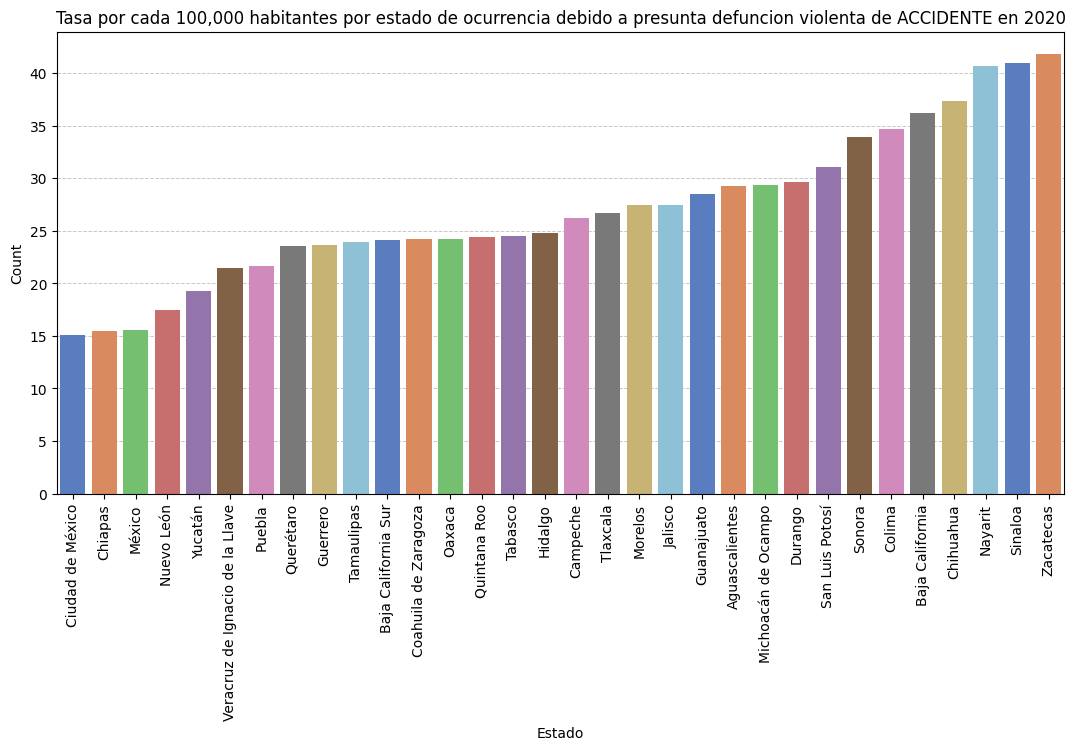

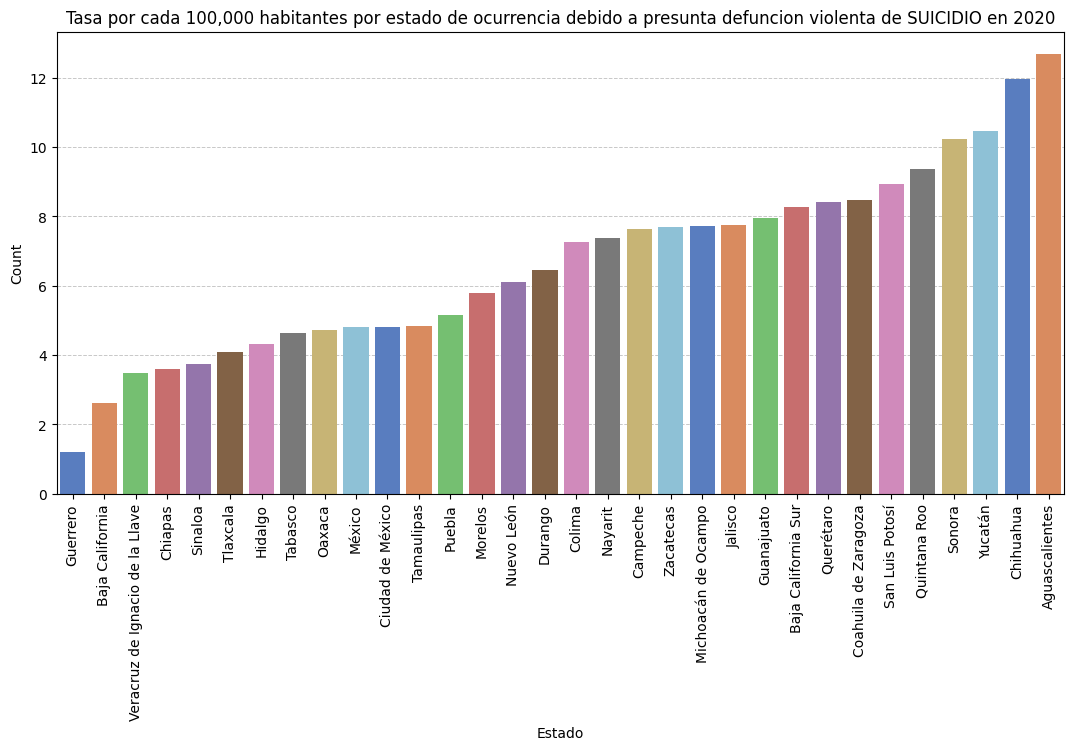

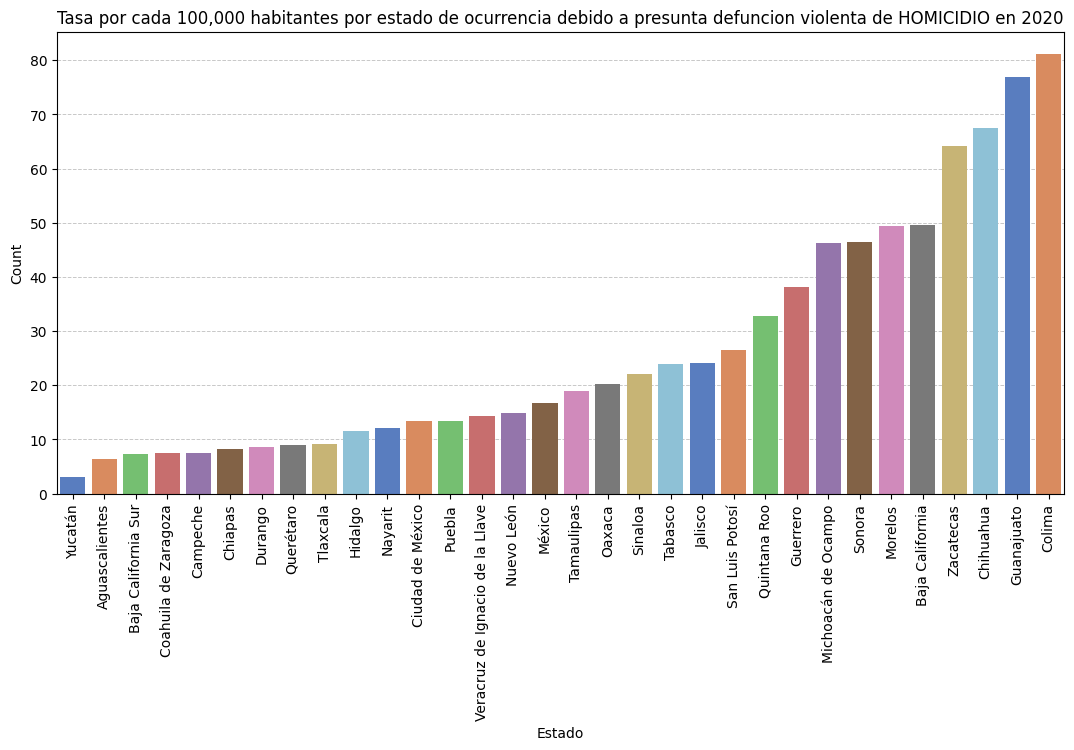

In [73]:
#Se itera por accidente, suicidio y homicidio para mostrar las tasas por cada 100,000 habitantes
names_tasas_2 = ["accidente", "suicidio", "homicidio"]

for i, col in enumerate(["tasas_ent_acci", "tasas_ent_suic", "tasas_ent_homi"]):
    plt.figure(figsize=(13, 6))
    count_data = tasas_presunto[[col]].sort_values(by=col)
    ax =sns.barplot(x=count_data.index, y=count_data[col], palette="muted")
    plt.tick_params(axis='x', rotation=90)
    plt.title("Tasa por cada 100,000 habitantes por estado de ocurrencia debido a presunta defuncion violenta de " + str.upper(names_tasas_2[i]) + " en 2020")
    plt.ylabel("Count")
    plt.grid(True, axis='y', linestyle='--', linewidth=0.7, alpha=0.7) 
    ax.set_axisbelow(True) 
    
    plt.xlabel("Estado")
    plt.show()

<div style="text-align: justify">
El estado con mayores accidentes reportados por cada 100,000 habitantes en 2020 fue Zacatecas y curiosamente el que menos tuvo accidentes con esta misma tasa fue la Ciudad de México.

Aguascalientes se pone en primera posición como el estado con mayor tasa de suicidios, seguido por Chihuahua. En este caso Guerrero es el estado con menor tasa de suicidios a nivel nacional.

Y en homicidios, Colima, Guanajuato, Chihuahua y Zacatecas lideran la lista por bastante, a comparación de Yucatán teniendo muy pocos asesinatos por cada 100,000 habitantes.

</div>

In [49]:
list_common_list_m = list(data["lista_mex"].value_counts().head(15).to_dict())

common_list_mex = pd.DataFrame()

common_list_mex = data[data["lista_mex"].isin(list_common_list_m)]

common_list_mex["lista_mex"].value_counts()

lista_mex
COVID-19                                         196492
Infarto agudo del miocardio                      151965
Diabetes mellitus                                147703
Neumonía                                          55641
Agresiones (homicidios)                           31738
Otras enfermedades del hígado                     25104
Enfermedades pulmonares obstructivas crónicas     21190
Insuficiencia renal                               14958
Enfermedad alcohólica del hígado                  14939
Enfermedad cardíaca hipertensiva                  13167
Accidentes de tráfico de vehículos de motor       12859
Hipertensión esencial                             10489
Las demás enfermedades isquémicas del corazón     10055
Las demás enfermedades hipertensivas               9680
Los demás accidentes y efectos tardíos             9659
Name: count, dtype: int64

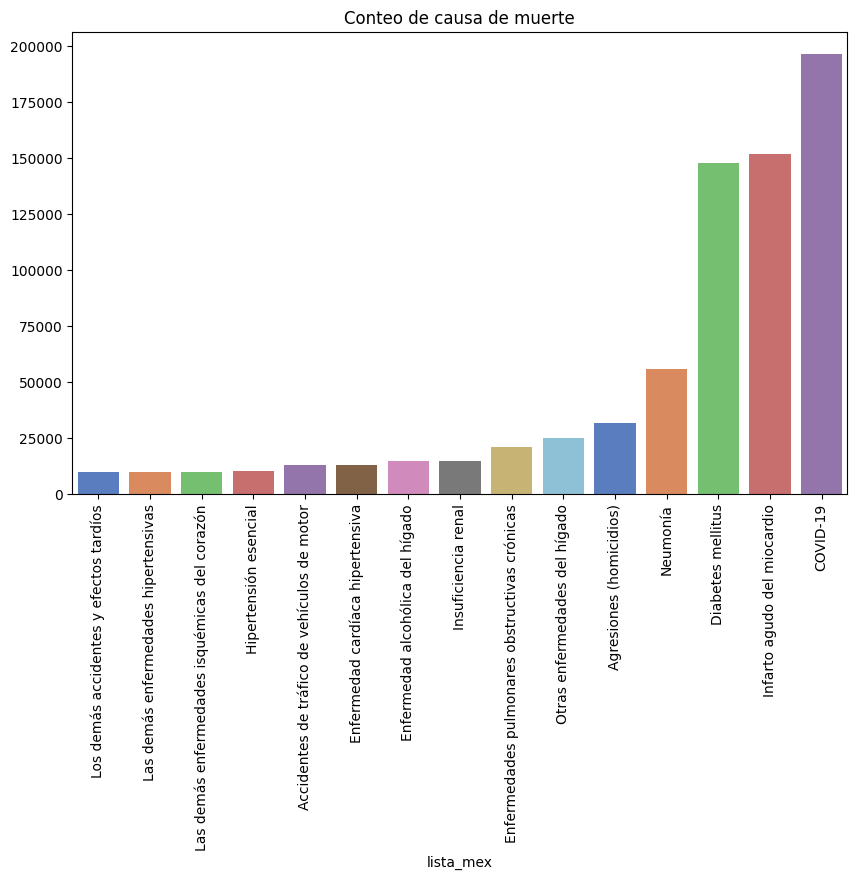

In [50]:
count_data = common_list_mex["lista_mex"].value_counts().sort_values()
plt.figure(figsize=(10, 6))
plt.tick_params(axis='x', rotation=90)
sns.barplot(x=count_data.index, y=count_data.values, palette="muted")
plt.title("Conteo de causa de muerte")
plt.show()

In [77]:
n_covid = common_list_mex[common_list_mex["lista_mex"] == "COVID-19"].shape[0]

print("Defunciones por COVID-19: ", n_covid)
print("% de defunciones por COVID-19: ", (n_covid/data.shape[0])*100)

Defunciones por COVID-19:  196492
% de defunciones por COVID-19:  18.781548790524155


<div style="text-align: justify">
La causa de muerte mas común durante ese año fue el COVID-19, teniendo 196,492 muertes. Lo que representa un 18% de todas las muertes durante ese año. 
Aunque no muy lejos del COVID-19 se encuentran "Infarto agudo del miocardío" y "Diabetes Mellitus"
</div>

In [52]:
tasas_ent_ocur_covid = {}
tasas_ent_regi_covid = {}
tasas_ent_resi_covid = {}

for state in entidades:
    
    tasas_ent_ocur_covid[state] =((data[ (data["ent_ocurr"] == state) & (data["lista_mex"] == "COVID-19")].shape[0]/poblacion_estados[state])*100000)
    tasas_ent_regi_covid[state] =((data[ (data["ent_regis"] == state) & (data["lista_mex"] == "COVID-19")].shape[0]/poblacion_estados[state])*100000)
    tasas_ent_resi_covid[state] =((data[ (data["ent_resid"] == state) & (data["lista_mex"] == "COVID-19")].shape[0]/poblacion_estados[state])*100000)

In [53]:
tasas_covid = pd.DataFrame({"tasas_ent_ocur_covid": tasas_ent_ocur_covid, "tasas_ent_regi_covid":tasas_ent_regi_covid, "tasas_ent_resi_covid": tasas_ent_resi_covid})

tasas_covid

,tasas_ent_ocur_covid,tasas_ent_regi_covid,tasas_ent_resi_covid
Aguascalientes,171.646183,170.944727,161.685514
Baja California,215.201830,215.254894,213.636436
Baja California Sur,116.350866,116.350866,117.728541
Campeche,144.447808,144.555524,148.002452
Coahuila de Zaragoza,197.567602,196.614244,197.154480
Colima,129.069130,129.069130,121.959390
Chiapas,48.251858,48.287934,50.127818
Chihuahua,193.138776,193.138776,193.940515
Ciudad de México,408.927568,409.068720,319.339618
Durango,149.073746,151.201812,151.911167


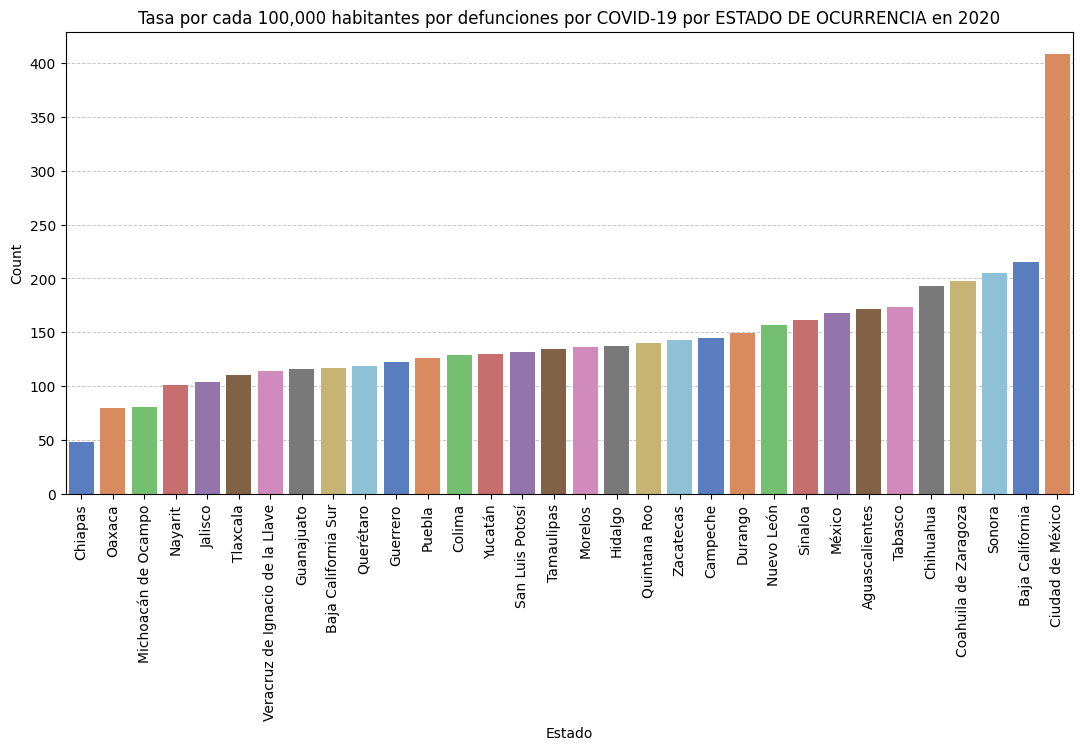

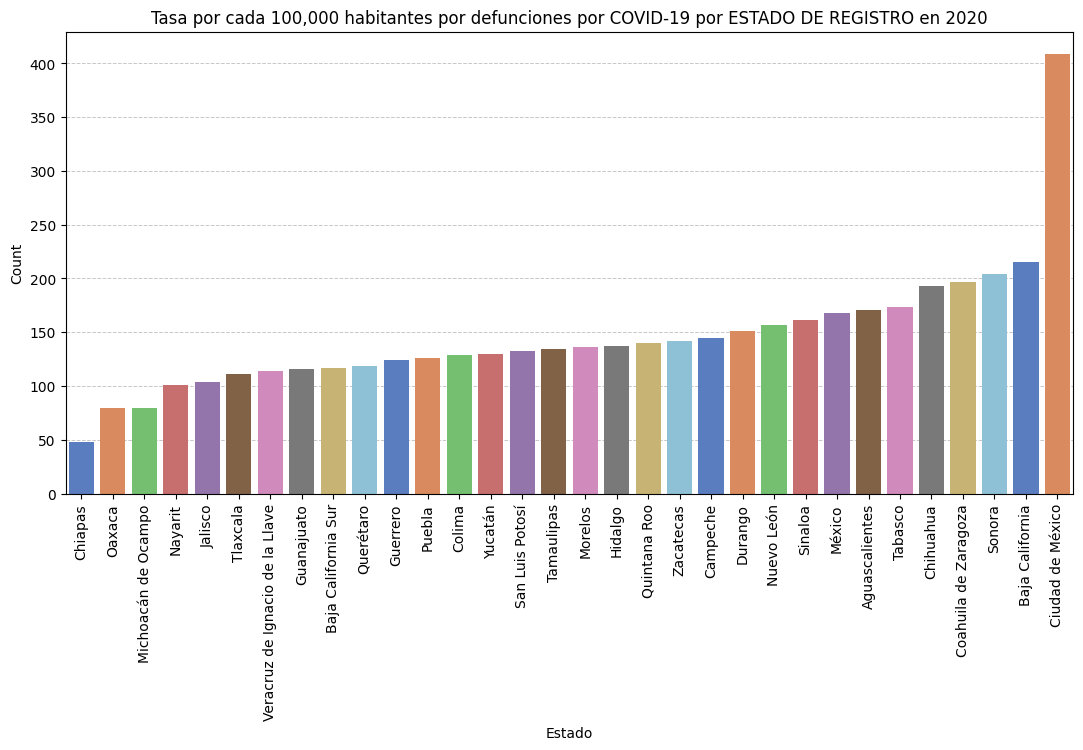

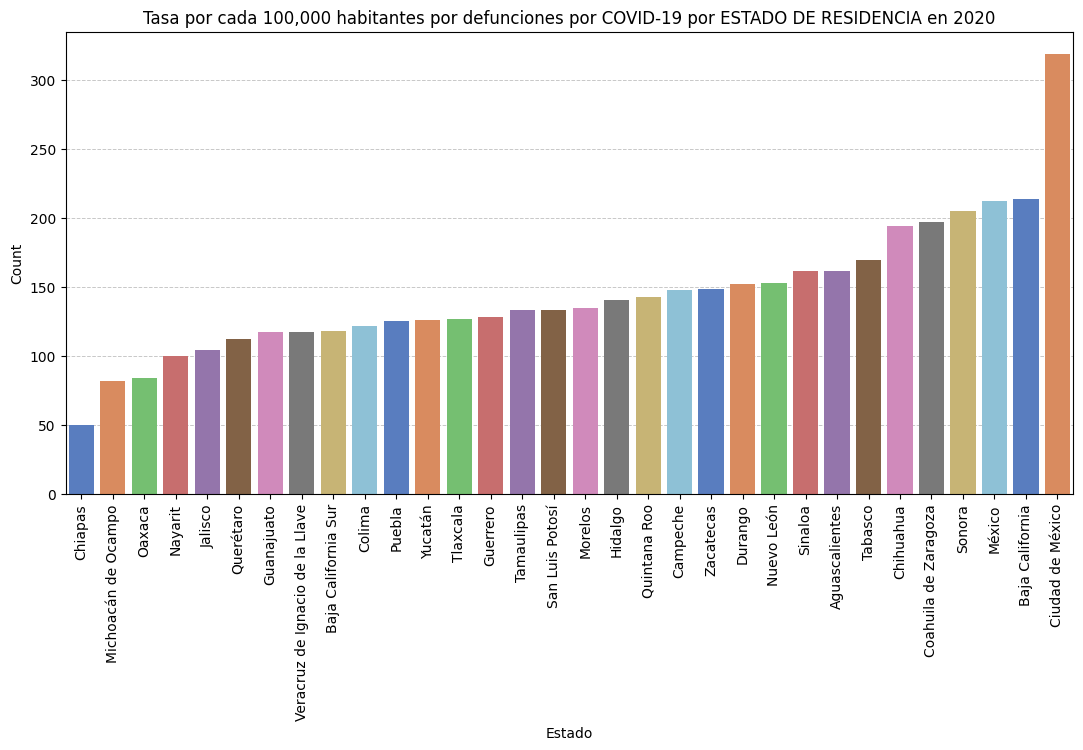

In [54]:
#Se itera por cada valor 
names_tasas_2 = ["estado de ocurrencia", "estado de registro", "estado de residencia"]

for i, col in enumerate(["tasas_ent_ocur_covid", "tasas_ent_regi_covid", "tasas_ent_resi_covid"]):
    plt.figure(figsize=(13, 6))
    count_data = tasas_covid[[col]].sort_values(by=col)
    ax =sns.barplot(x=count_data.index, y=count_data[col], palette="muted")
    plt.tick_params(axis='x', rotation=90)
    plt.title("Tasa por cada 100,000 habitantes por defunciones por COVID-19 por " + str.upper(names_tasas_2[i]) + " en 2020")
    plt.ylabel("Count")
    plt.grid(True, axis='y', linestyle='--', linewidth=0.7, alpha=0.7) 
    ax.set_axisbelow(True) 
    
    plt.xlabel("Estado")
    plt.show()

<div style="text-align: justify">
La Ciudad de México fue la Ciudad que mayores fallecidos por COVID-19 tuvo por cada 100,000 habitantes, lidereando la lista por una diferencia de 100 o 200 defunciones según la gráfica.

El estado de ocurrencia en la Ciudad de México es el mayor, y es que un efecto interesante es que 100 de las 400 por cada 100,000 habitantes que fallecían por COVID-19, eran foráneos, es decir que no residían en la Ciudad de México, ya que en estado de residencia, la tasa en la Ciudad de México disminuye por 100 personas aproximadamente. 


</div>

## Modelo

Ahora recordando la correlación entre variables para el modelo se tiene el dataframe y se hace un mapa de las correlaciones entre las variables: 

In [55]:
df

,sexo,edad,edad_agru,escolarida,edo_civil,ocupacion,sitio_ocur,causa_def,lista_mex,ent_regis,ent_ocurr,ent_resid,dia_ocurr,mes_ocurr,anio_ocur,presunto,par_agre,area_ur
sexo,1.00,0.23,0.23,0.14,0.20,0.39,0.10,0.27,0.21,0.04,0.06,0.15,0.14,0.16,0.18,0.12,0.10,0.11
edad,0.23,1.00,1.00,0.37,0.45,0.31,0.15,0.14,0.10,0.03,0.03,0.10,0.05,0.08,0.04,0.25,0.10,0.31
edad_agru,0.23,1.00,1.00,0.36,0.44,0.31,0.15,0.24,0.21,0.03,0.03,0.11,0.05,0.08,0.06,0.25,0.10,0.31
escolarida,0.14,0.37,0.36,1.00,0.38,0.37,0.11,0.28,0.27,0.09,0.09,0.13,0.03,0.04,0.04,0.09,0.05,0.26
edo_civil,0.20,0.45,0.44,0.38,1.00,0.38,0.12,0.33,0.32,0.14,0.14,0.17,0.03,0.04,0.04,0.10,0.07,0.16
ocupacion,0.39,0.31,0.31,0.37,0.38,1.00,0.11,0.25,0.24,0.09,0.09,0.12,0.02,0.04,0.04,0.10,0.05,0.28
sitio_ocur,0.10,0.15,0.15,0.11,0.12,0.11,1.00,0.30,0.26,0.12,0.12,0.13,0.03,0.03,0.02,0.28,0.14,0.20
causa_def,0.27,0.14,0.24,0.28,0.33,0.25,0.30,1.00,1.00,0.10,0.10,0.11,0.04,0.11,0.05,1.00,0.26,0.23
lista_mex,0.21,0.10,0.21,0.27,0.32,0.24,0.26,1.00,1.00,0.07,0.07,0.07,0.02,0.09,0.03,1.00,0.24,0.18
ent_regis,0.04,0.03,0.03,0.09,0.14,0.09,0.12,0.10,0.07,1.00,1.00,0.95,0.01,0.06,0.03,0.08,0.04,0.26


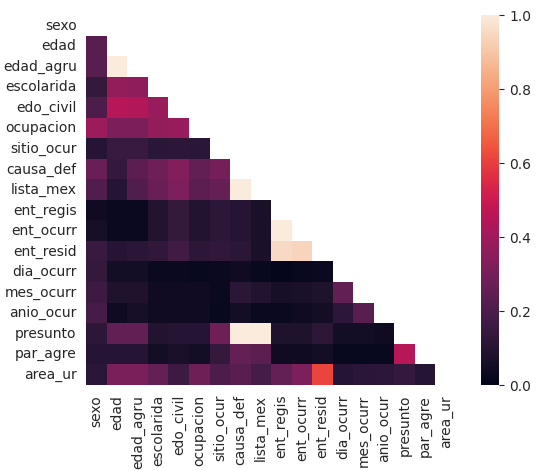

In [56]:

mask = np.zeros_like(df, dtype=bool)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    ax = sns.heatmap(df, mask=mask,vmin=0., vmax=1, square=True)

plt.show()

In [57]:
sorted(dict(df["causa_def"]).items(), key=lambda x:x[1], reverse=True)[0:15]

[('causa_def', 1.0),
 ('lista_mex', 1.0),
 ('presunto', 1.0),
 ('edo_civil', 0.33),
 ('sitio_ocur', 0.3),
 ('escolarida', 0.28),
 ('sexo', 0.27),
 ('par_agre', 0.26),
 ('ocupacion', 0.25),
 ('edad_agru', 0.24),
 ('area_ur', 0.23),
 ('edad', 0.14),
 ('ent_resid', 0.11),
 ('mes_ocurr', 0.11),
 ('ent_regis', 0.1)]

In [58]:
sorted(dict(df["lista_mex"]).items(), key=lambda x:x[1], reverse=True)[0:15]


[('causa_def', 1.0),
 ('lista_mex', 1.0),
 ('presunto', 1.0),
 ('edo_civil', 0.32),
 ('escolarida', 0.27),
 ('sitio_ocur', 0.26),
 ('ocupacion', 0.24),
 ('par_agre', 0.24),
 ('sexo', 0.21),
 ('edad_agru', 0.21),
 ('area_ur', 0.18),
 ('edad', 0.1),
 ('mes_ocurr', 0.09),
 ('ent_regis', 0.07),
 ('ent_ocurr', 0.07)]

Aquí se muestran las mejores 15 variables de correlación con causa_def y lista_mex. Se ocupará como variable objetivo causa_def ya que sus indices de correlación con Cramer V son ligeramente mayores. 
Además las variables predictoras serán: 

- edo_civil
- escolarida
- ocupacion
- sexo
- edad_agru

Ya que estas variables se pueden conocer antes de la defunción y en el modelo se intentará calcular la causa de muerte mas probable de acuerdo con los datos anteriores.


In [59]:
model_columns = ["edo_civil", "escolarida", "ocupacion", "sexo", "edad_agru", "causa_def"]

data_model = data[model_columns]

#Cambiando los tipos de datos en data_save
for col in model_columns:
    data_model[col] = data_model[col].astype('object')

data_model.dtypes


edo_civil     object
escolarida    object
ocupacion     object
sexo          object
edad_agru     object
causa_def     object
dtype: object

In [80]:
# Mezclar datos
data_model = shuffle(data_model)

# Usar una muestra más pequeña
data_sample = data_model.sample(n=100000, random_state=42)

# Definir las columnas categóricas
categorical_features = ['edo_civil', 'escolarida', 'ocupacion', 'sexo', 'edad_agru']
categorical_transformer = OneHotEncoder(drop='first')

# Crear preprocesador con ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'
)

# Crear pipeline que incluya preprocesamiento y modelo
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, n_jobs=-1))
])

# Separar las características y el objetivo
x = data_sample.drop('causa_def', axis=1)
y = data_sample['causa_def']

# Dividir los datos en conjuntos de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)

# Entrenar el modelo
model.fit(x_train, y_train)

# Realizar predicciones
y_pred = model.predict(x_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)
#print("\nClassification report:\n", classification_report(y_test, y_pred))

Accuracy:  0.2018


<div style="text-align: justify">
Este modelo predictivo no es el mejor, ya que su Accuracy es del 0.2018, lo cuál era de esperar por los bajos niveles de correlación entre cada una de las variables, por lo que se requeriría mucha mas información de la persona para poder predecir su posible causa de muerte, como antecedentes de enfermedades en familiares, alimentación, estilo de vida, entre otros aspectos que no se incluyen en esta base de datos.
</div>

### Conclusión

<div style="text-align: justify">

Tal y como era esperado la causa de muerte más común durante 2020 fue el COVID-19, además de que es más probable la muerte en personas de más de 60 años que en jóvenes, lo cuál coincide con lo que la intuición nos dice.

Por otro lado el mes en el que más defunciones suceden es en Junio, esto probablemente al virus. Además de que el 58% de todas las defunciones que ocurrieron en México en 2020 fueron únicamente hombres. fallecen mas hombres al año que mujeres.

Los hombres están mas relacionados con tener presuntas defunciones violentas, tanto en homicidios, accidentes y suicidios, siendo más de la mitad en todos estos casos.

Del total de homicidios registrados solo se reportaron presuntos agresores de un 0.5% de ellos y de los reportados la mayoría de los agresores no tenía ningún parentesco con las personas difuntas.

En cuanto al suicidio, es más común en jóvenes, siendo el rango de edad mayor entre 25 y 29 años, además de que la mayoría de estas personas que se suicidan no cuentan con trabajo y su nivel educativo es de la secundaria terminada.

Aguascalientes es el estado con mayor tasa de suicidios por cada 100,000 habitantes. Zacatecas la de mayor accidentes, curiosamente la capital es el estado con menor tasa de Accidentes y Colima es el estado con mayor tasa de homicidios.

La Ciudad de México fue el estado de la República con mayor tasa de fallecimientos por COVID-19 por cada 100,000 habitantes, siendo un cuarto de estos no residentes en la Ciudad. 

La detección de una posible causa de muerte es muy complicada y los datos que esta base de datos nos ofrece no son suficientes para crear un modelo con buen Accuracy y que permita una predicción mas exacta.

</div>